<h1 style="font-family:verdana;"> <center>Red Wine Quality using 8 ML algorithms</center> </h1>


Welcome to this notebook, where I will go through Exploratory Data Analysis (EDA) and classification tasks with the goal of achieving balanced and reliable results. During this journey, I will thoroughly examine a set of machine learning algorithms, including: 


1. Linear Models:
    - Logistic Regression
2. Tree-Based Models:
    - Decision Trees
    - Random Forests
3. Support Vector Classifier:
    - SVC
4. Boosting Models:
    - Gradient Boosting
    - XGBoost
    - Light GBM Model
5. Distance-Based Models:
    - K-Nearest Neighbors Model


Throughout this notebook, I delve into the workings of each algorithm group, unraveling their intricacies while highlighting their advantages and disadvantages. I also provide detailed explanations of the key hyperparameters that regulate each model's behavior, methodically fine-tuning them to improve performance and achieve higher accuracies.

Finally, my goal is to give you with a comprehensive resource, filled with insights and approaches that you can easily apply to your own projects (Click "Edit Notebook" to easily start your project by modifying my code). I hope that this notebook will empower you to perform classification tasks with confidence and proficiency.

# Importing Libraries

In [45]:
import os
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, roc_curve, RocCurveDisplay, auc, accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgbm
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [46]:
pip install qbstyles

Note: you may need to restart the kernel to use updated packages.


In [47]:
from qbstyles import mpl_style

*📌 You can apply the dark theme with "True" and remove it with "False".*

In [48]:
mpl_style(dark=True)

In [49]:
data = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

In [50]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [51]:
columns = data.columns
print(columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [53]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

### Summary Statistics

In [54]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

# Exploratory Data Analysis (EDA)

### Pie Chart & Countplot

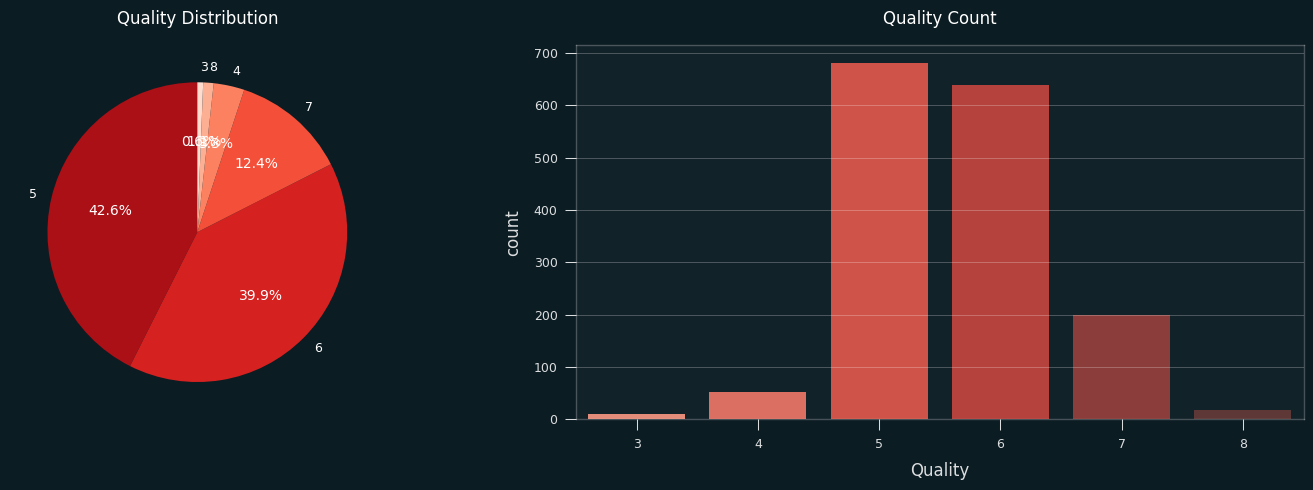

In [55]:
# Plotting the pie chart
plt.figure(figsize=(15, 5))

# Pie chart
plt.subplot(1, 2, 1)
quality_counts = data['quality'].value_counts()
plt.pie(quality_counts, labels=quality_counts.index, colors=sns.color_palette('Reds_r', len(quality_counts)), autopct='%1.1f%%', startangle=90)
plt.title('Quality Distribution')

# Count plot
plt.subplot(1, 2, 2)
sns.countplot(data=data, x='quality', palette='Reds_d')
plt.title('Quality Count')
plt.xlabel('Quality')

plt.tight_layout()
plt.show()

### Histograms

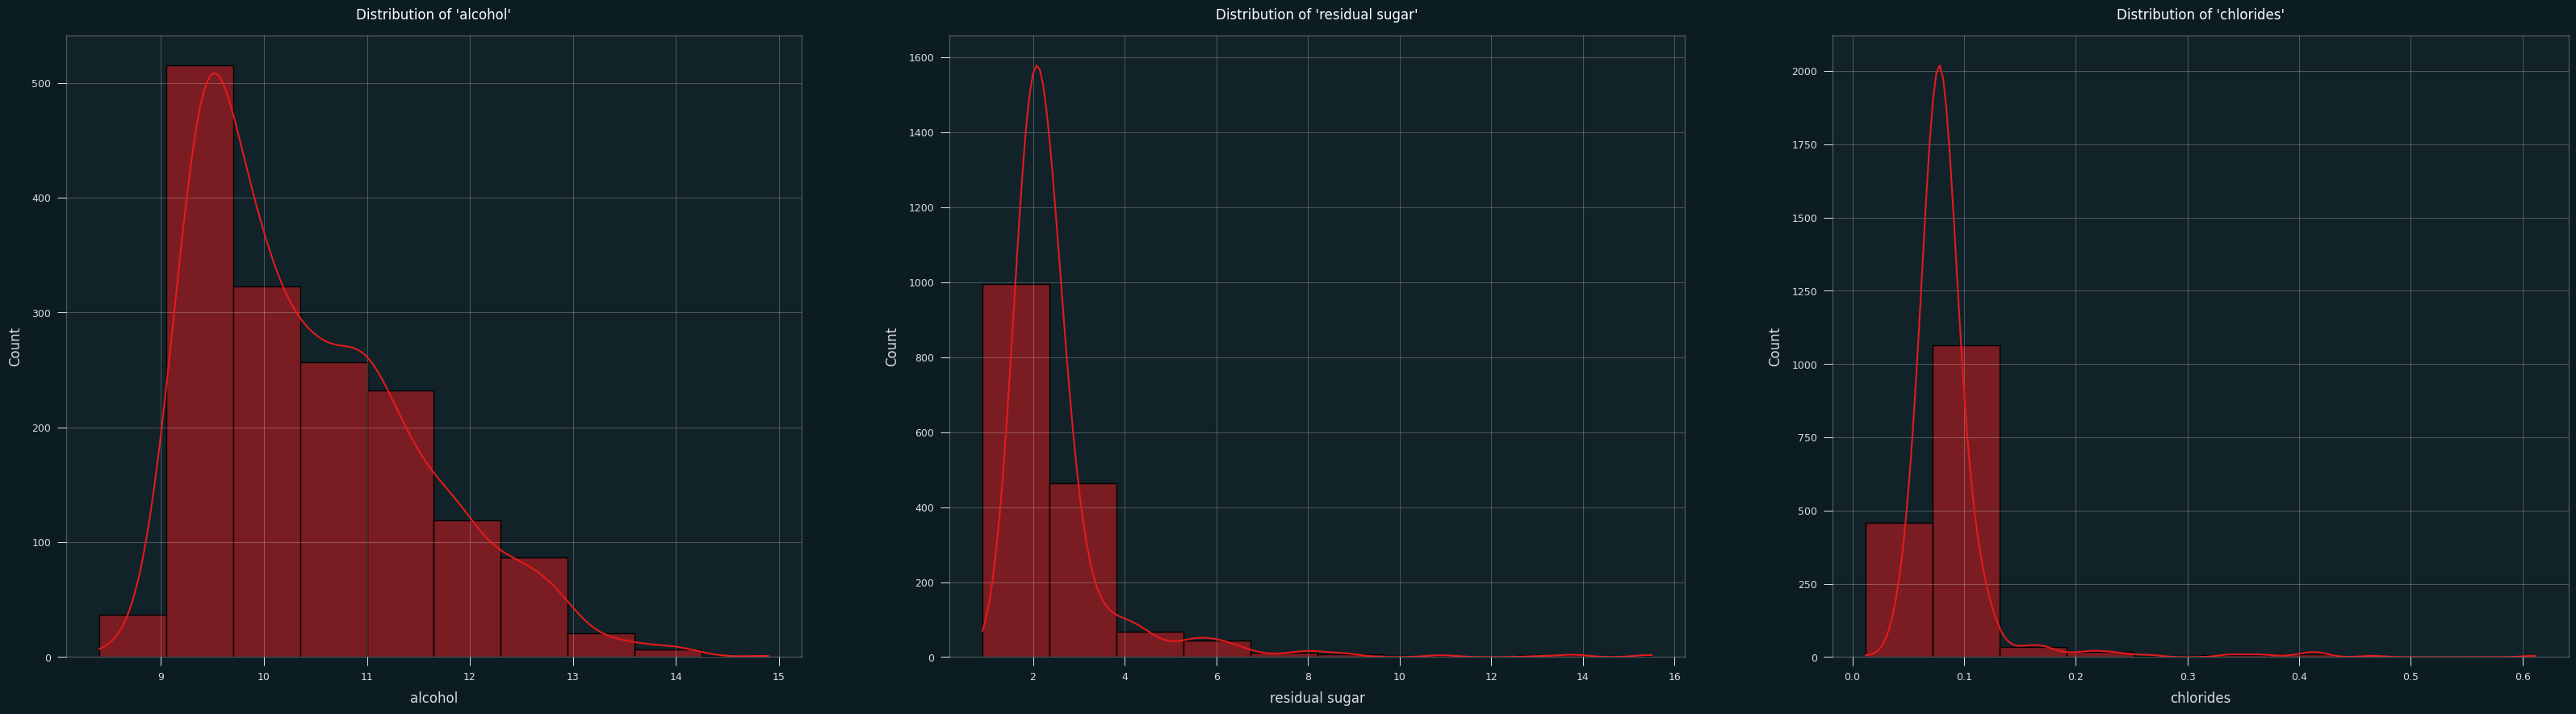

In [56]:
plt.figure(figsize=(40, 10))

plt.subplot(1, 3, 1)
sns.histplot(x=data["alcohol"],
             bins=10,
             kde=True,
             cbar=True)
plt.title("Distribution of 'alcohol'")

plt.subplot(1, 3, 2)
sns.histplot(x=data["residual sugar"],
             bins=10,
             kde=True,
             cbar=True)
plt.title("Distribution of 'residual sugar'")

plt.subplot(1, 3, 3)
sns.histplot(x=data["chlorides"],
             bins=10,
             kde=True,
             cbar=True)
plt.title("Distribution of 'chlorides'")

plt.show()

### Pairplot

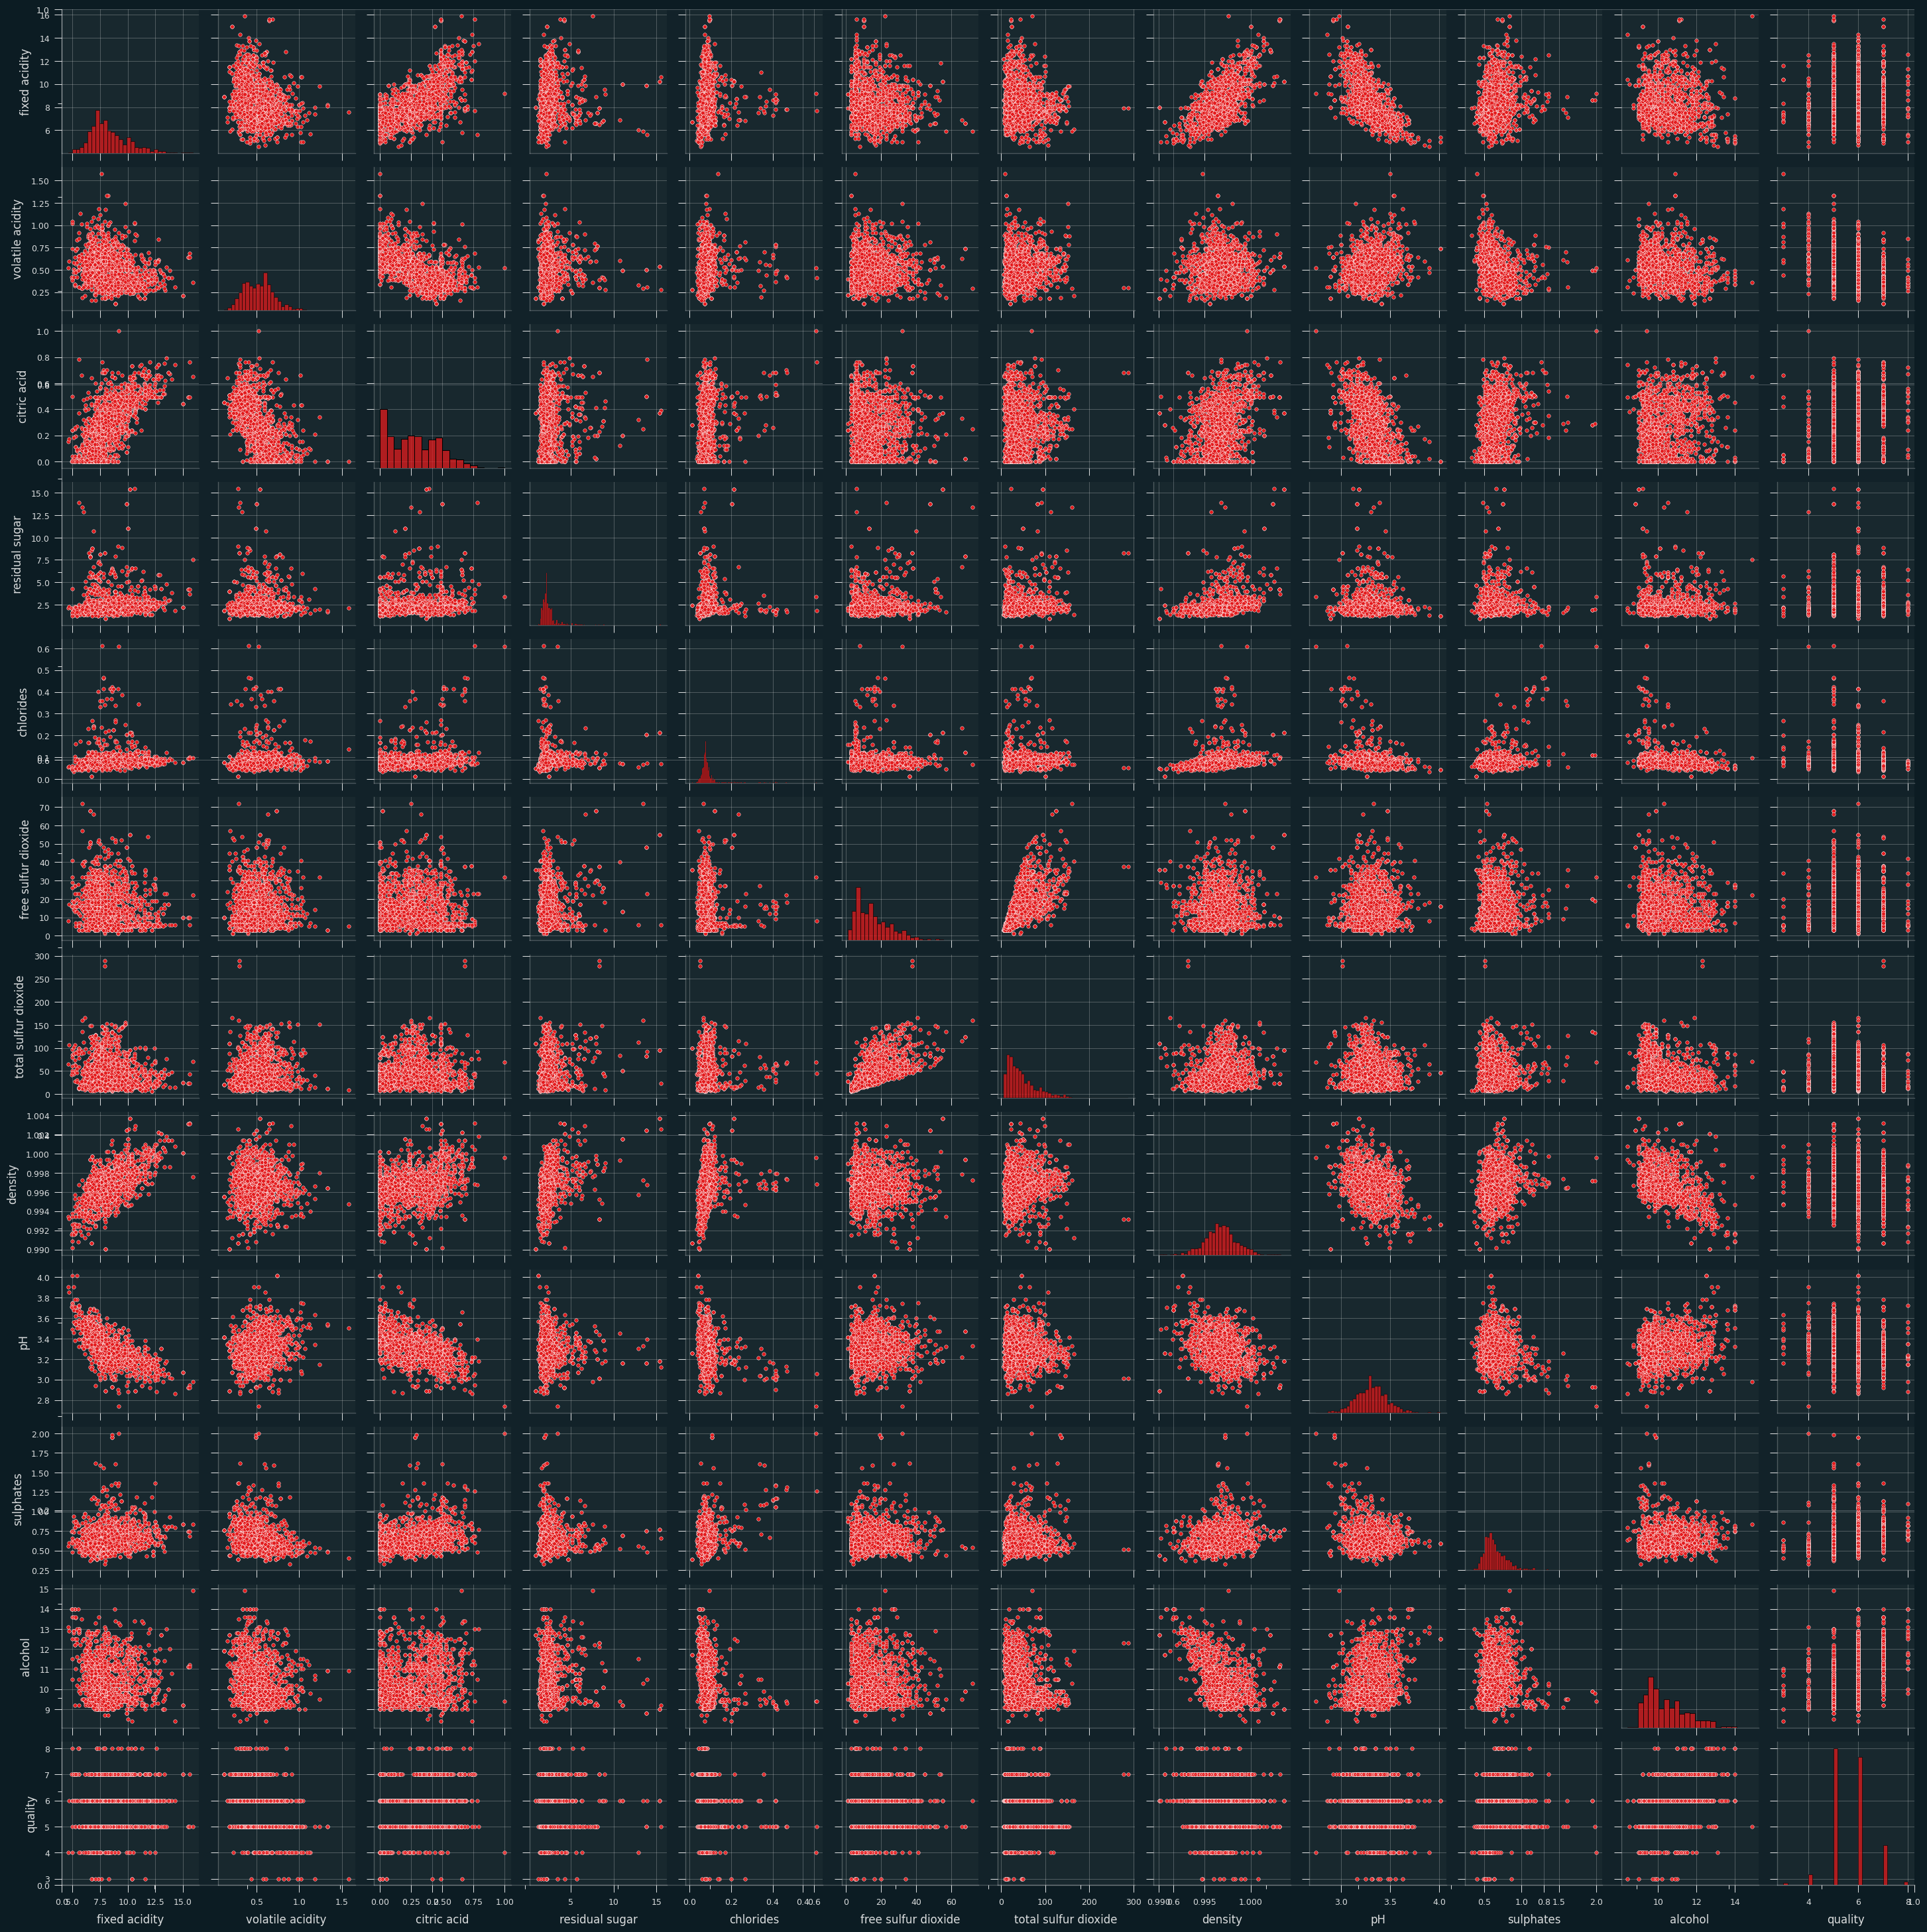

In [57]:
# Check correleation between the variables using pairplot. 
sns.pairplot(data)
plt.show()

### Bar Chart

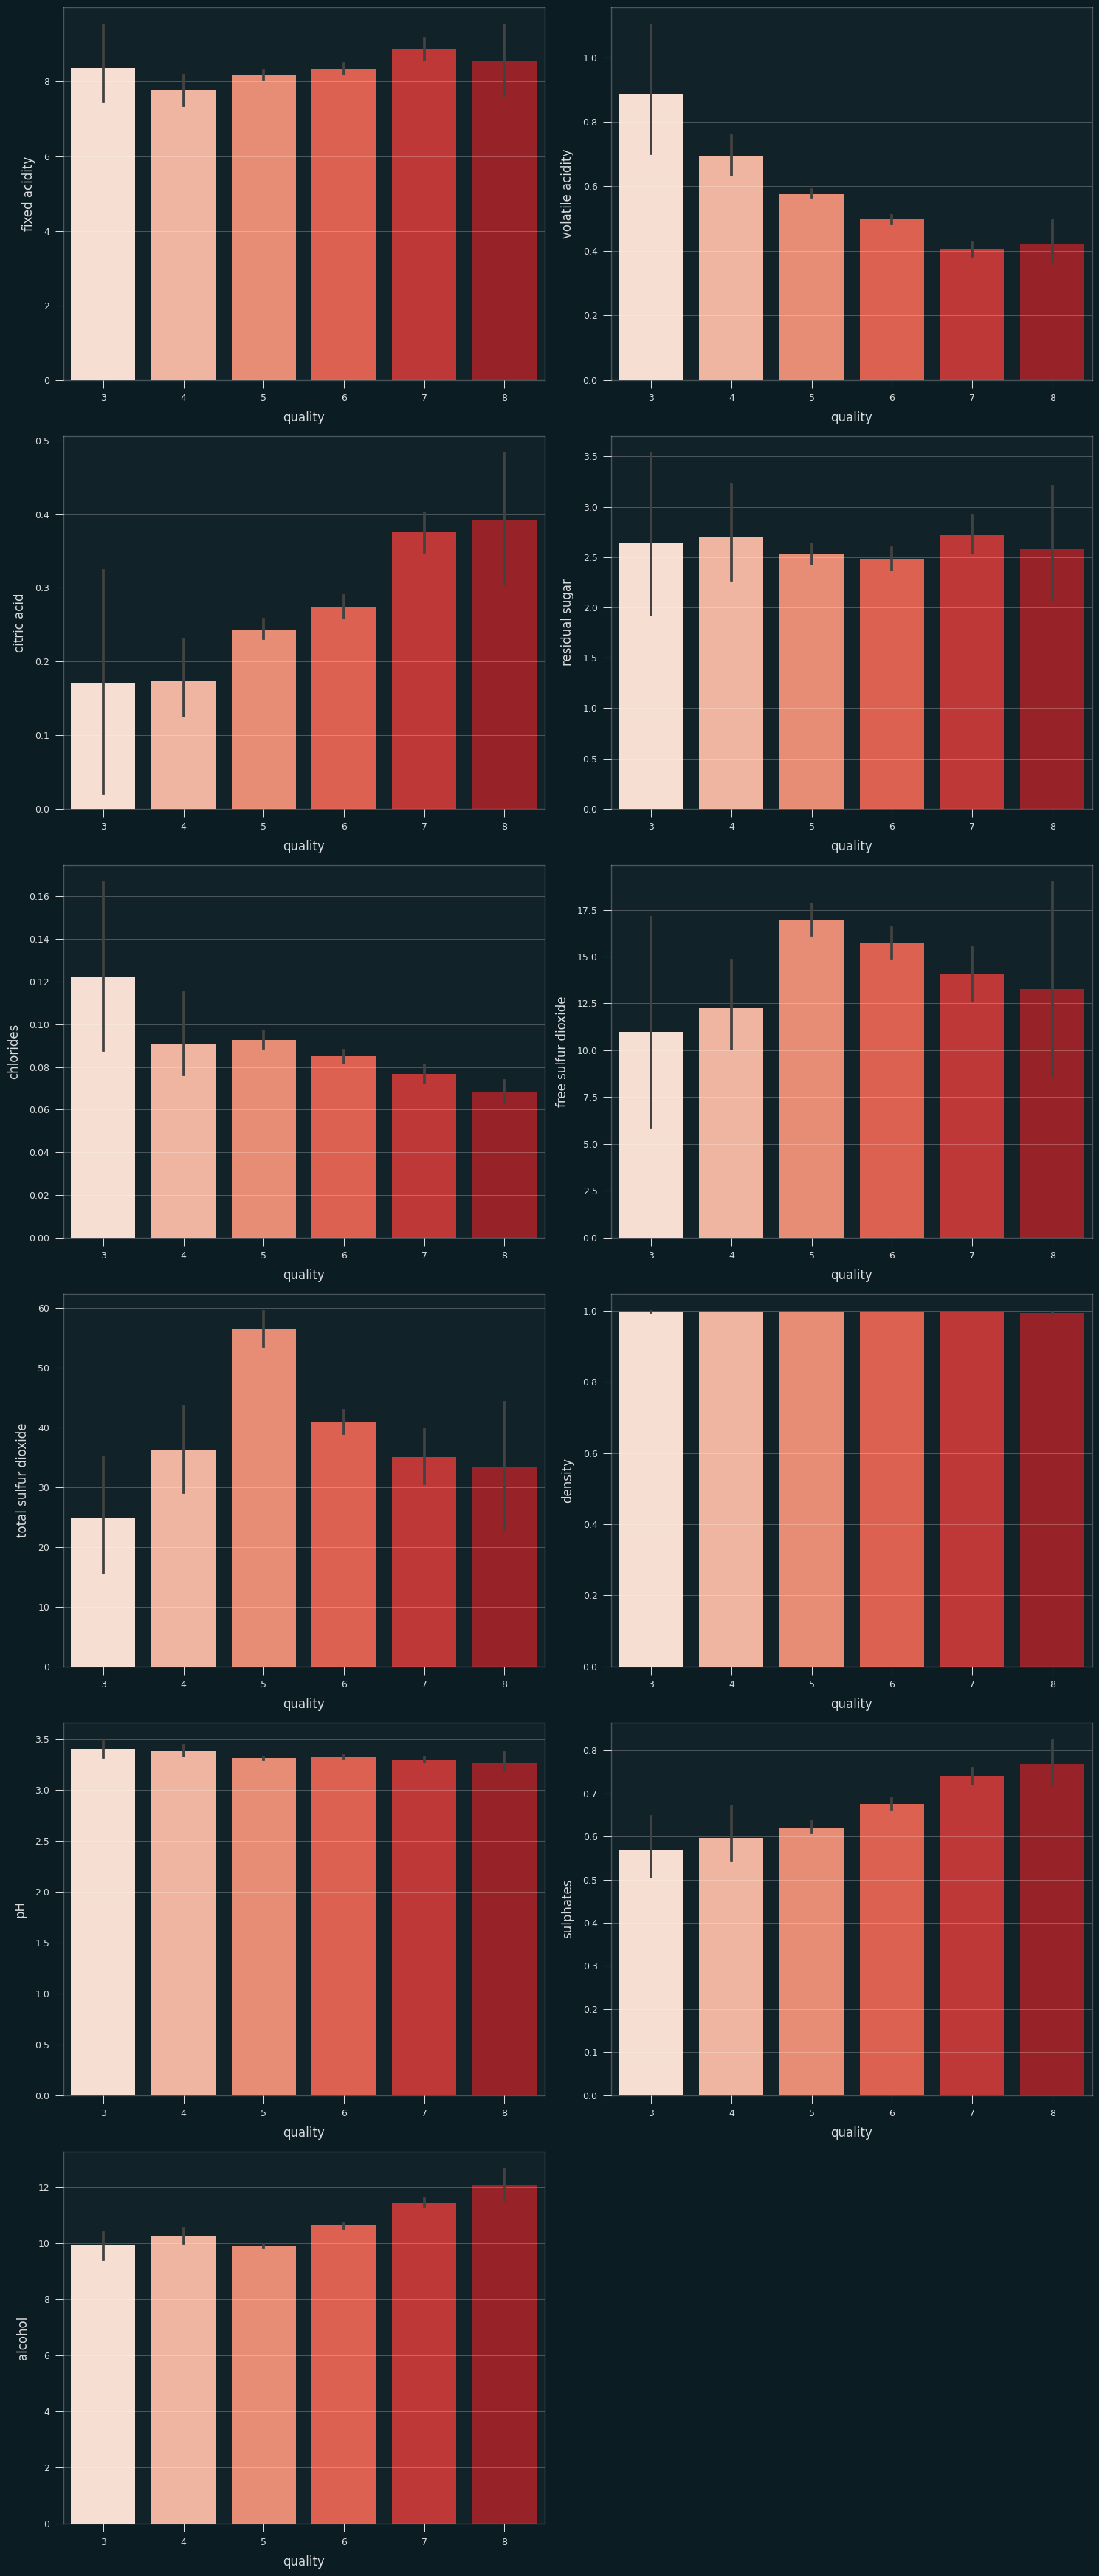

In [58]:
plt.figure(figsize=(15, 35))

for i in range(1,12):
    plt.subplot(6, 2, i)
    sns.barplot(x='quality', y=columns[i-1], data=data, palette='Reds')

plt.tight_layout()
plt.show()

### Boxplot

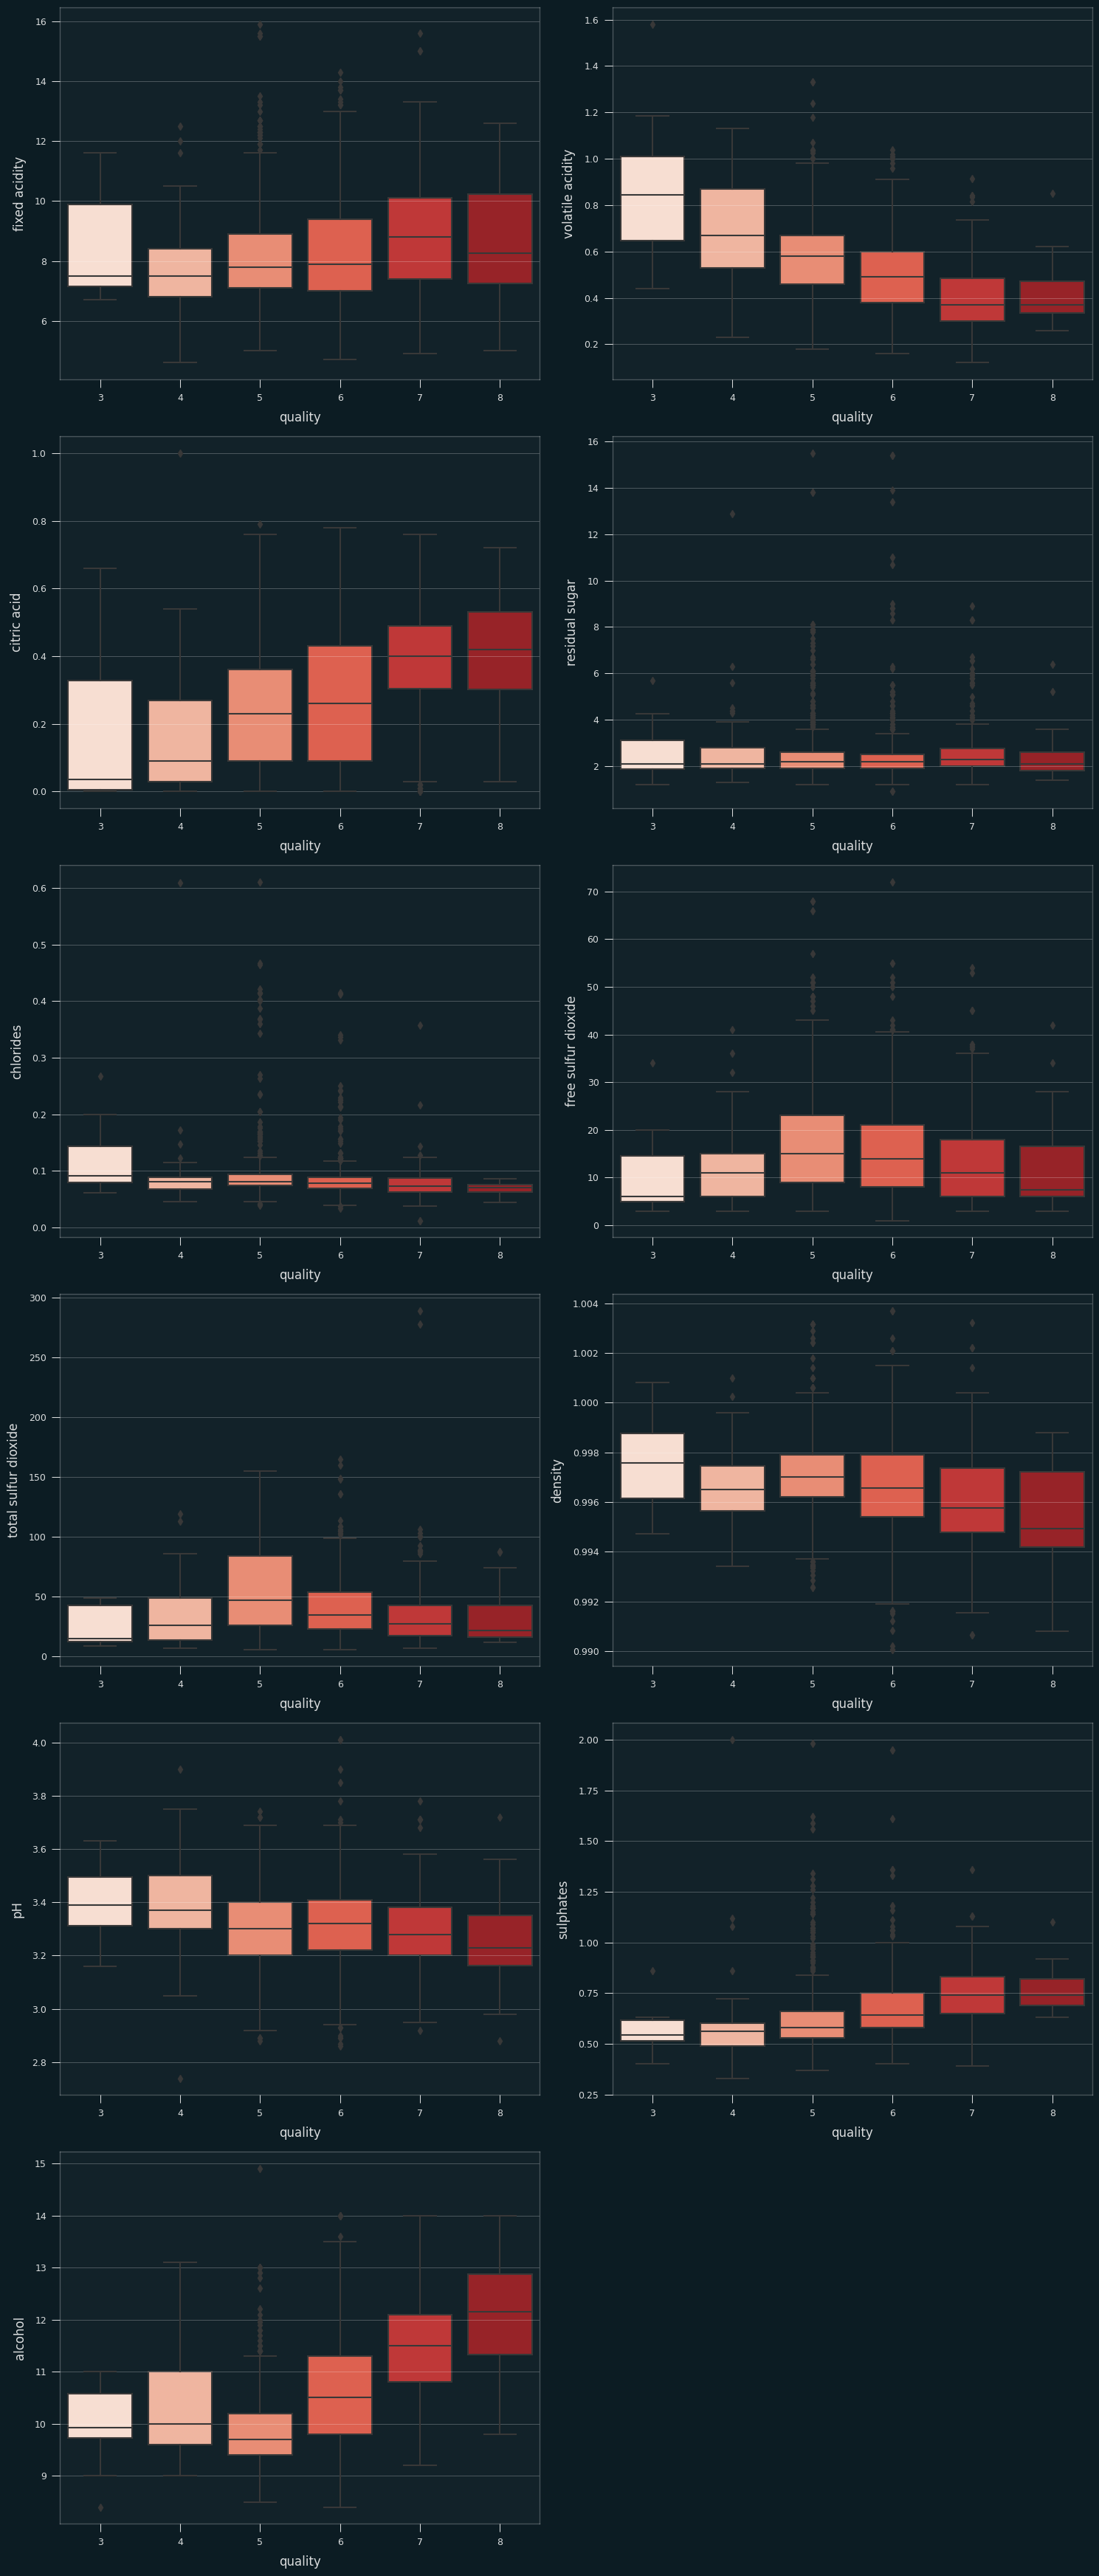

In [59]:
plt.figure(figsize=(15, 35))

for i in range(1,12):
    plt.subplot(6, 2, i)
    sns.boxplot(x='quality', y=columns[i-1], data=data, palette='Reds')

plt.tight_layout()
plt.show()

### Boxenplot

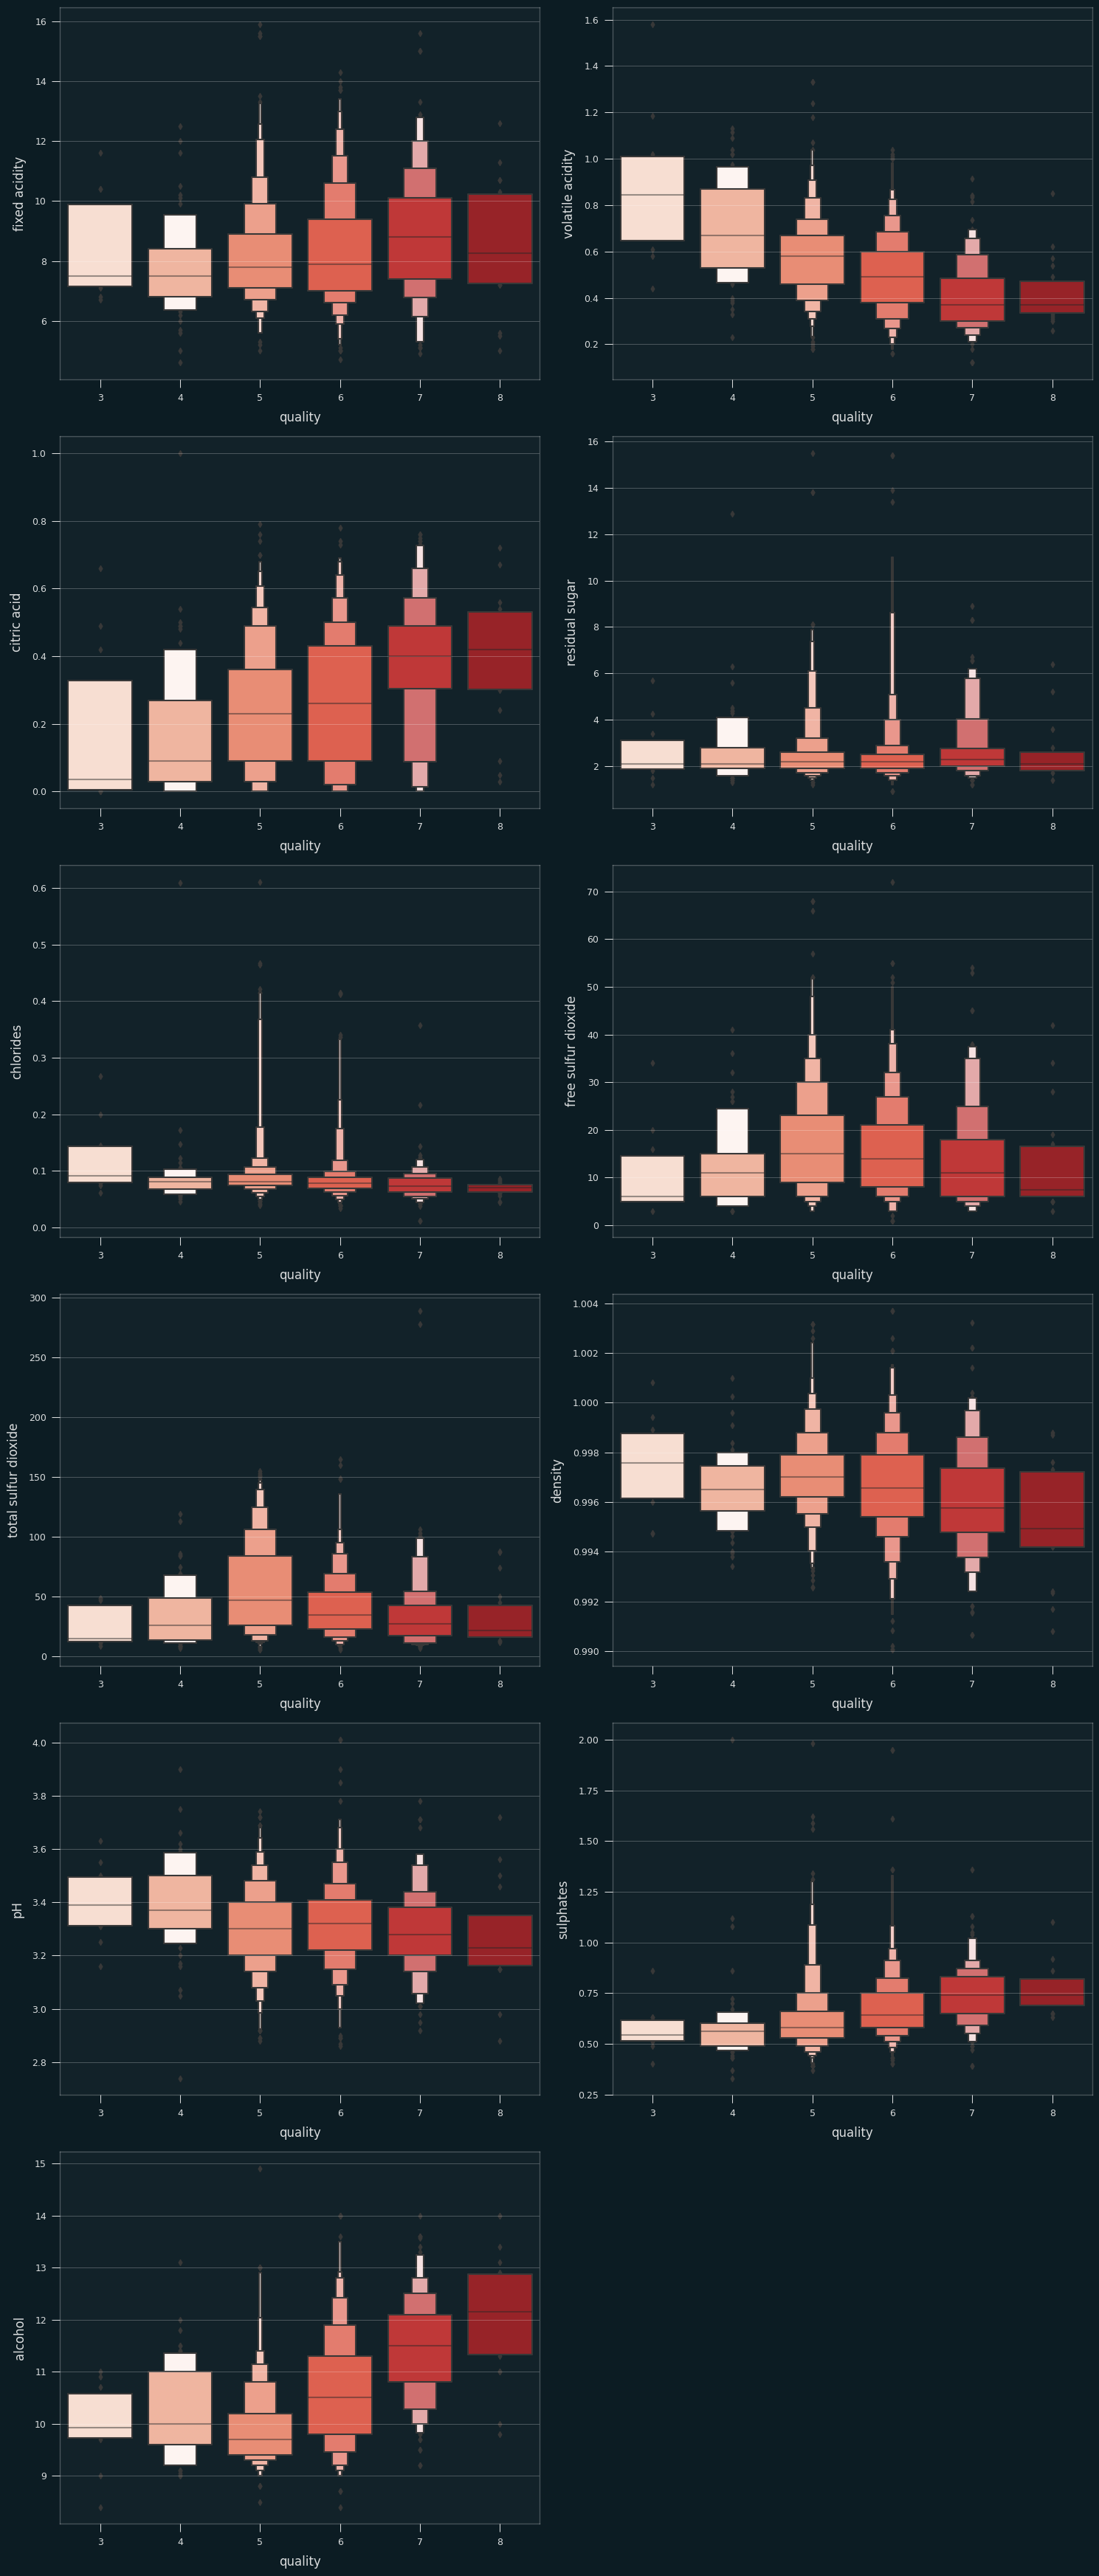

In [60]:
plt.figure(figsize=(15, 35))

for i in range(1,12):
    plt.subplot(6, 2, i)
    sns.boxenplot(x='quality', y=columns[i-1], data=data, palette='Reds')

plt.tight_layout()
plt.show()


### Violinplot

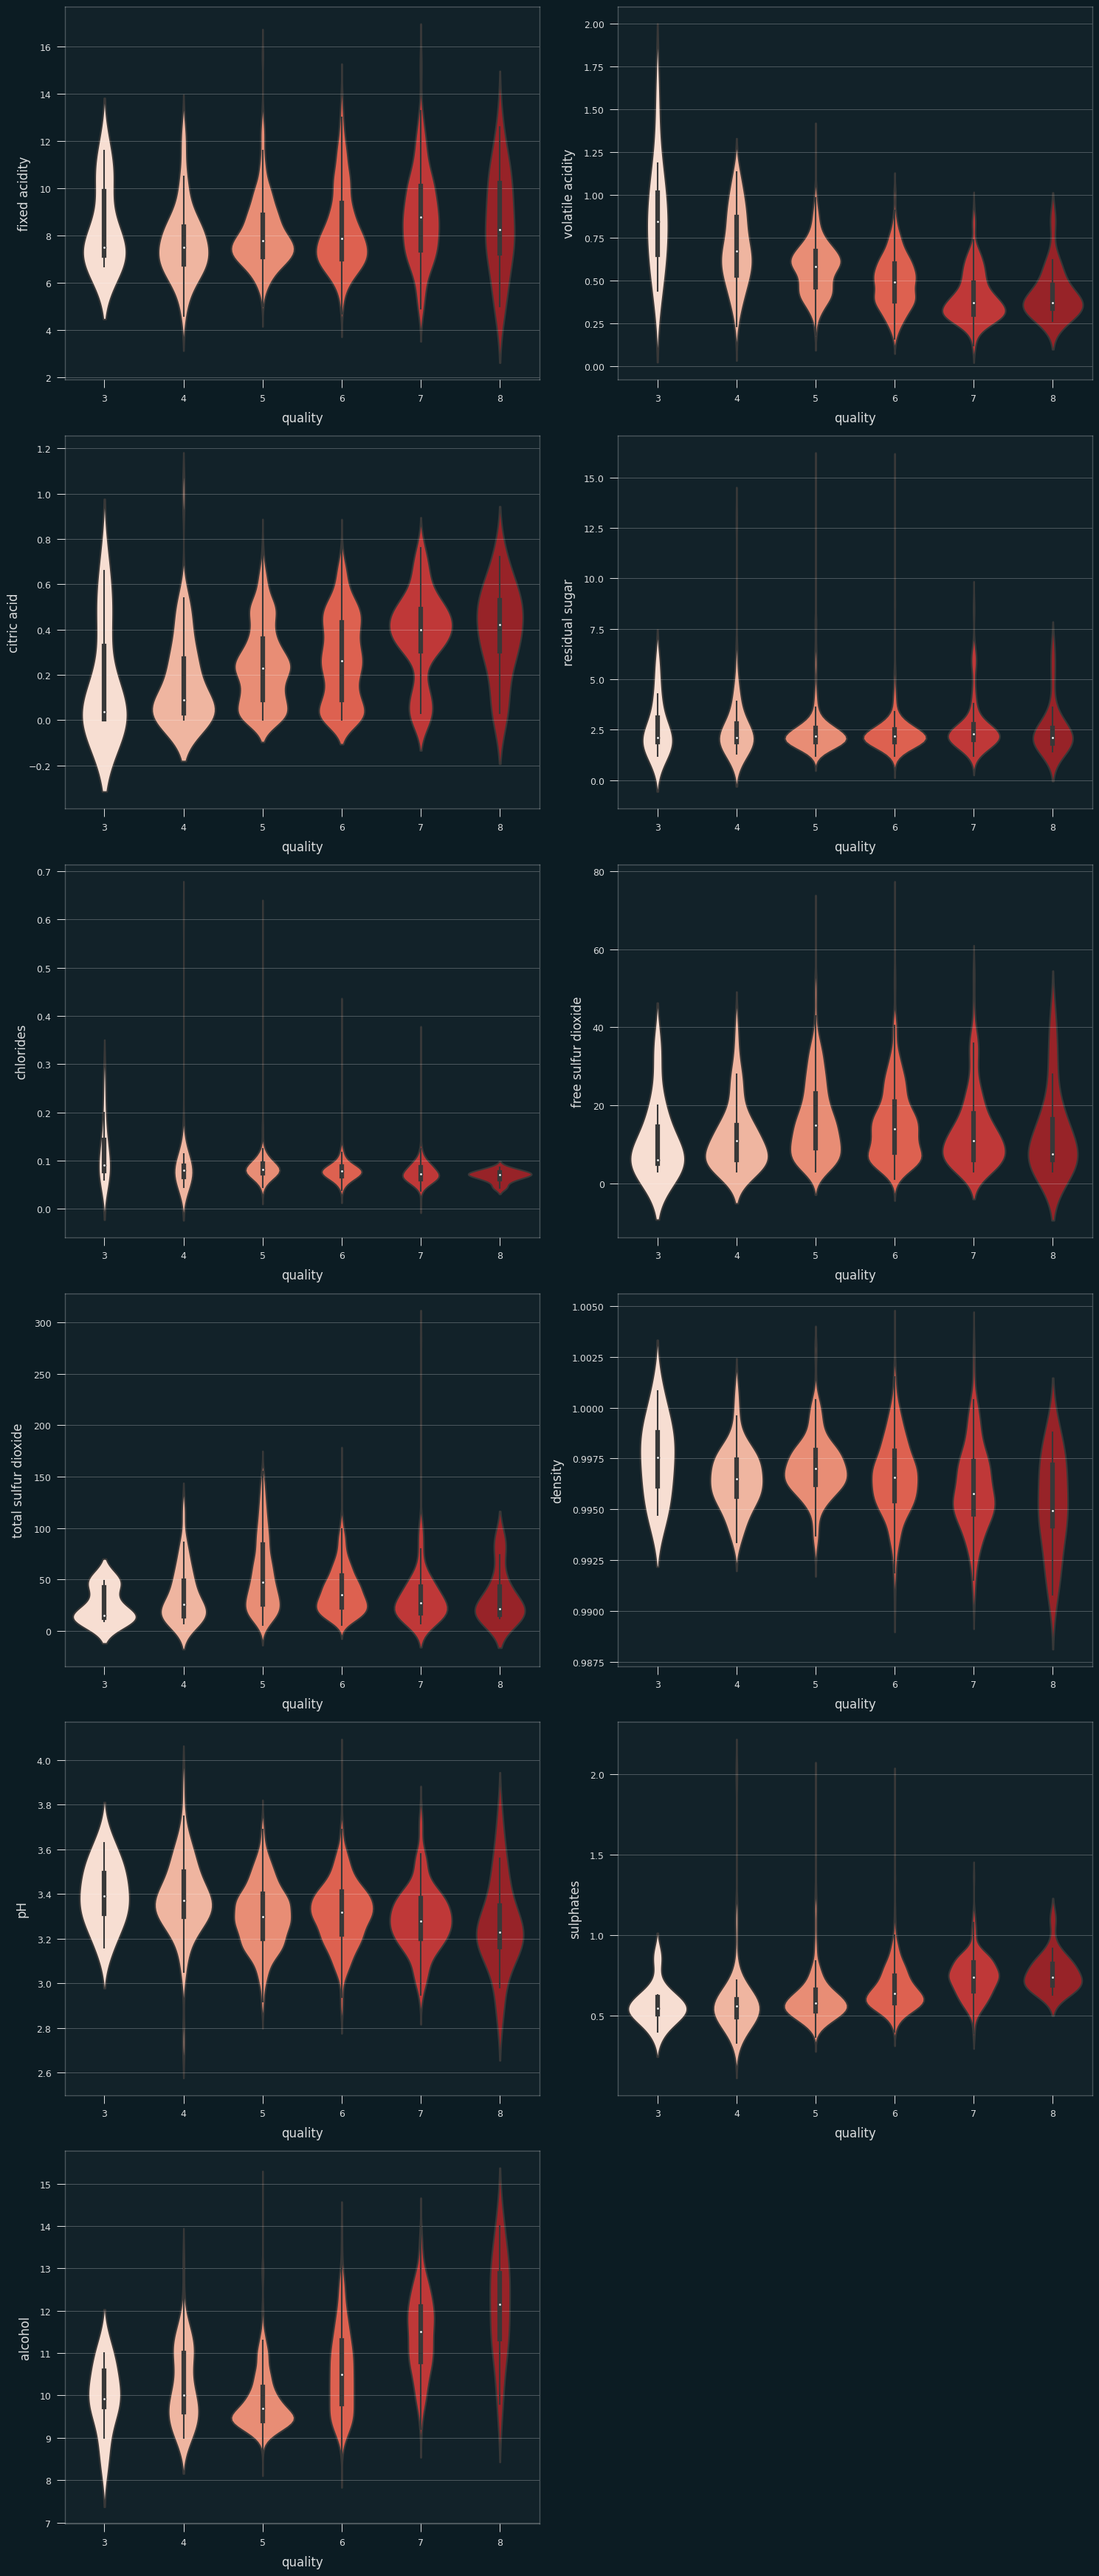

In [61]:
plt.figure(figsize=(15, 35))

for i in range(1,12):
    plt.subplot(6, 2, i)
    sns.violinplot(x='quality', y=columns[i-1], data=data, palette='Reds')

plt.tight_layout()
plt.show()


### Correlation Matrix

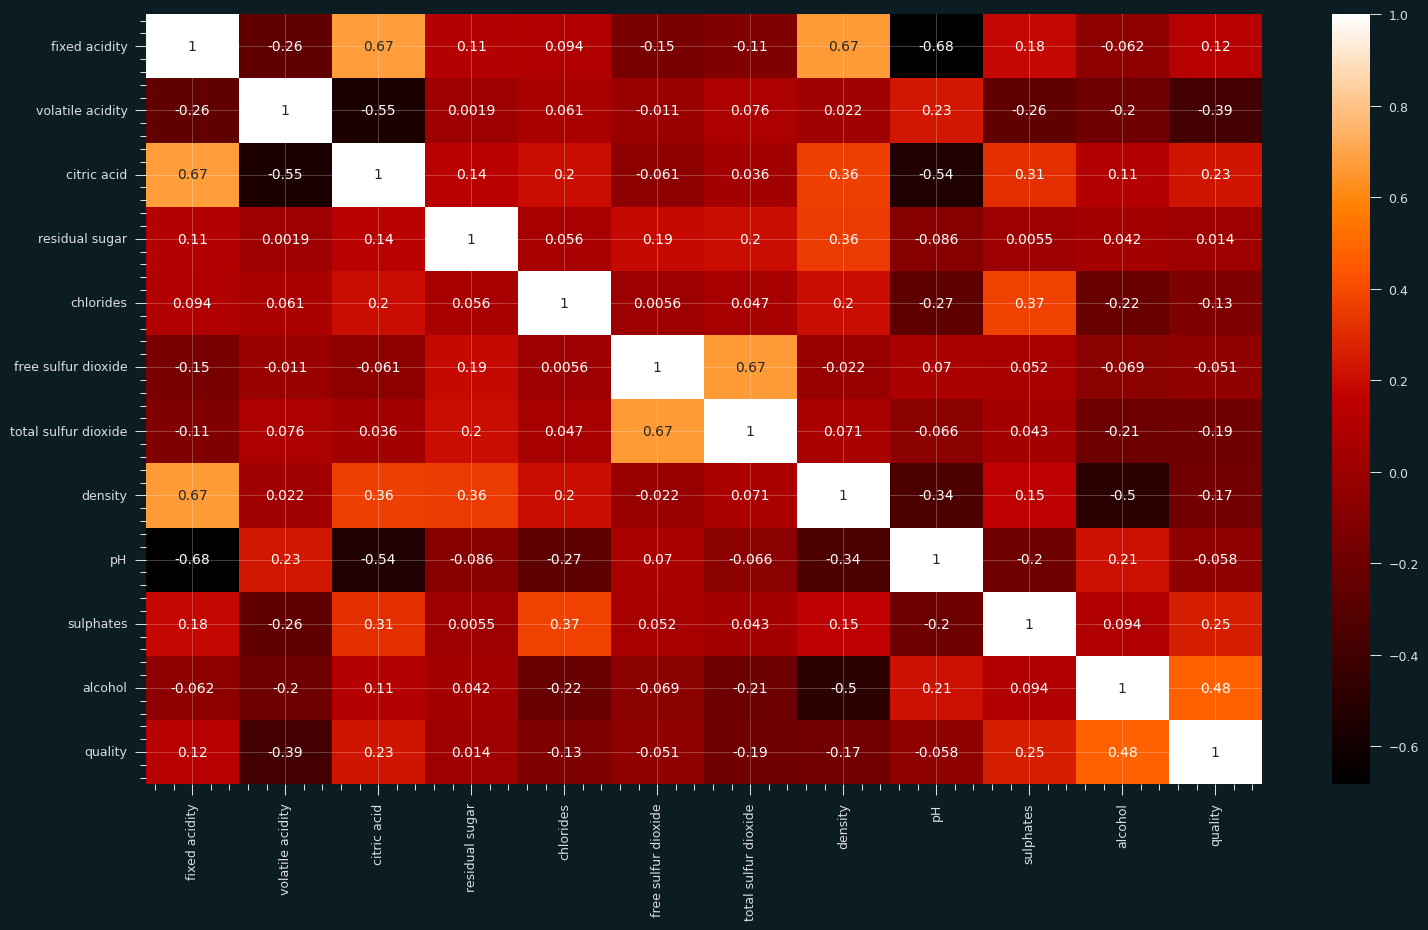

In [62]:
plt.figure(figsize = (18,10))
sns.heatmap(data.corr(), annot=True,  cmap='gist_heat')
plt.show()

# Data Preprocessing 

In [63]:
bins = (2, 5, 8)
labels = ['bad', 'good']
data['quality'] = pd.cut(x = data['quality'], bins = bins, labels = labels)

In [64]:
data['quality'].value_counts()

quality
good    855
bad     744
Name: count, dtype: int64

In [65]:
labelencoder_y = LabelEncoder()
data['quality'] = labelencoder_y.fit_transform(data['quality'])

In [66]:
train_columns = data.columns[:-1]
train_columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

> 📌 '0' indicates Bad quality, while '1' indicates Good quality. 

In [67]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        0  
1      9.8        0  
2      9.8        0  
3      9.8        1  
4      9.4        0

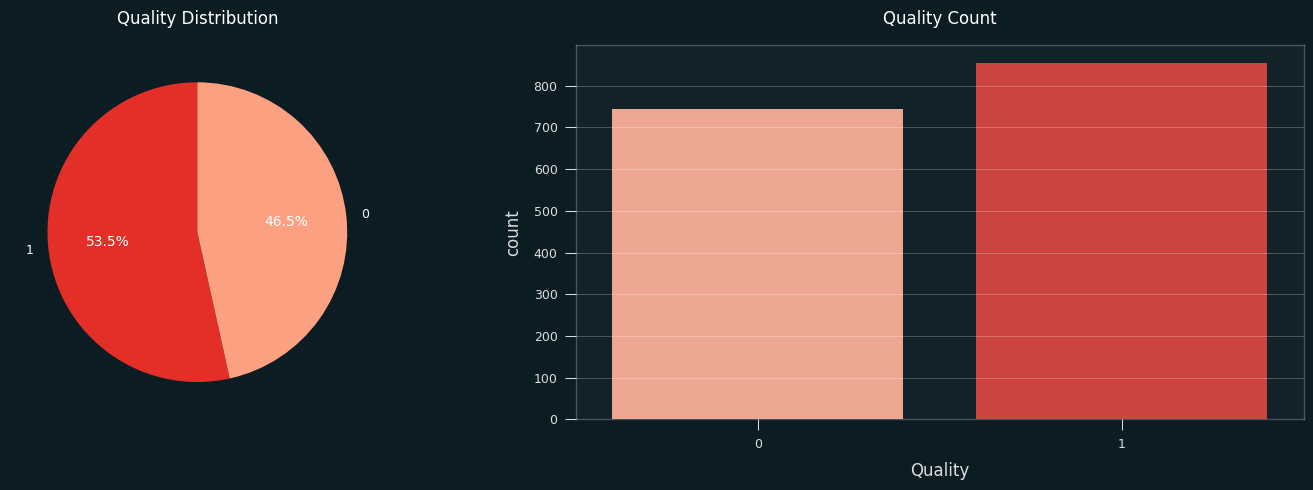

In [68]:
plt.figure(figsize=(15, 5))

# Pie chart
plt.subplot(1, 2, 1)
quality_counts = data['quality'].value_counts()
plt.pie(quality_counts, labels=quality_counts.index, colors=sns.color_palette('Reds_r', len(quality_counts)), autopct='%1.1f%%', startangle=90)
plt.title('Quality Distribution')

# Count plot
plt.subplot(1, 2, 2)
sns.countplot(data=data, x='quality', palette='Reds')
plt.title('Quality Count')
plt.xlabel('Quality')

plt.tight_layout()
plt.show()

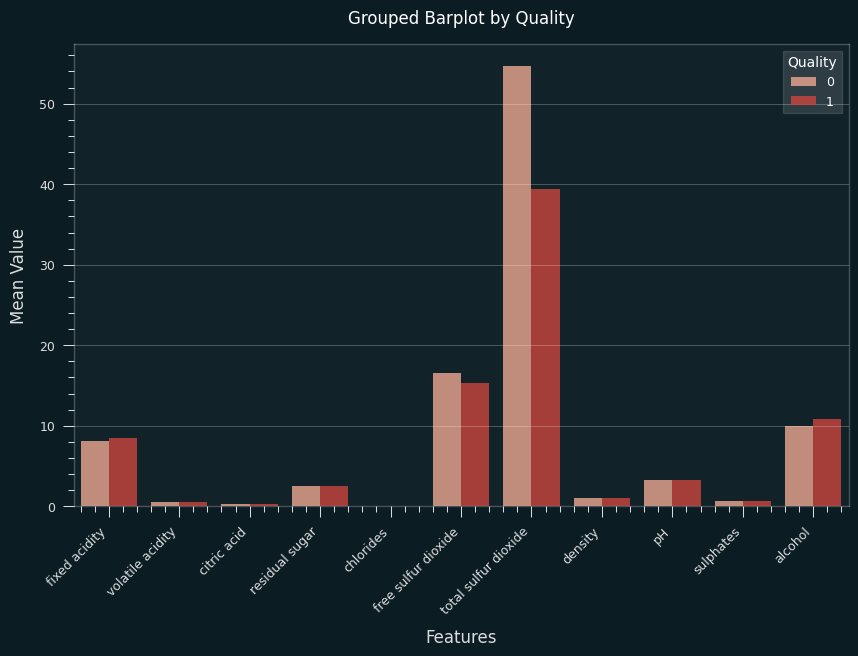

In [69]:
# Group by quality and calculate the mean for each quality
grouped_mean = data.groupby('quality').mean()

plt.figure(figsize=(10, 6))

# Plot the grouped bars using Seaborn's barplot
sns.barplot(data=grouped_mean.reset_index().melt(id_vars='quality'),
            x='variable', y='value', hue='quality', palette='Reds', alpha=0.8)

plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.title('Grouped Barplot by Quality')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.legend(title='Quality')
plt.show()


In [70]:
X = data.drop('quality', axis = 1).values
y = data['quality']

In [71]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1279, 11)
Shape of X_test:  (320, 11)
Shape of y_train:  (1279,)
Shape of y_test (320,)


In [72]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [73]:
y_train = y_train.ravel()
y_test = y_test.ravel()

## Evaluate Model Function

In [74]:
algo_name = []
accuracy = []
models = []

def evaluate_model(algorithm_name, model): 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)
    acc_model = model.score(X_test, y_test)
    train_acc_model = model.score(X_train, y_train)
    
    algo_name.append(algorithm_name)
    accuracy.append(acc_model)
    
    print('\033[33m' + f' For {algorithm_name}' + '\033[0m')
    print(' Training Accuracy: %.4f %%\n'%(model.score(X_train, y_train) * 100),
          'Testing Accuracy: %.4f %%\n'%(model.score(X_test, y_test) * 100),
          'Accuracy Score: %.4f %%\n'%(accuracy_score(y_test, y_pred) * 100))
    
    fig, axes = plt.subplots(1, 2, figsize = (15, 8))
    plt.subplot(1, 2, 1)
    fig.suptitle('Graphs for ' + algorithm_name, fontsize=25)
    
    # Plot Confusion Matrix
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, 
                cmap='Reds', annot_kws={'size': 15}, 
                square=True, fmt='.0f',
                ax=axes[0])
    axes[0].set_title('Confusion Matrix', fontsize=20)
    
    # Plot ROC Curve
    plt.subplot(1, 2, 2)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])
    roc = auc(fpr, tpr)
    RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=axes[1])
    axes[1].set_xlabel('False Positive Rate', fontsize=15)
    axes[1].set_ylabel('True Positive Rate', fontsize=15)
    axes[1].set_title(f'ROC AUC = {roc:.2f}', fontsize=20)
    
    plt.tight_layout()
    plt.show()


    # Plot permutation importance
    if (algorithm_name != 'K Nearest Neighbors'):
        # Calculate permutation importance
        perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

        # Get feature importances
        feature_importance = perm_importance.importances_mean
        feature_names = train_columns

        # Plot permutation importance
        plt.figure(figsize=(10, 6))
        plt.barh(feature_names, feature_importance, color = '#b40000' )
        plt.xlabel('Permutation Importance')
        plt.ylabel('Feature')
        plt.title('Permutation Importance for Features')
        plt.show()

    
    tp = confusion_matrix(y_test, y_pred)[0, 0]
    fp = confusion_matrix(y_test, y_pred)[0, 1]
    tn = confusion_matrix(y_test, y_pred)[1, 1]
    fn = confusion_matrix(y_test, y_pred)[1, 0]

    models.append((algorithm_name, tp, fp, tn, fn, train_acc_model, acc_model))

# 1. Linear Models

## Logistic Regression

Linear classification algorithm predicting event probabilities using logistic curve fitting.

**Advantages:**

* Simplicity: Easy to implement and understand.
* Efficiency: Suitable for huge datasets; computationally efficient.
* Interpretable coefficients: Clear interpretation of feature importance.

**Disadvantages:**

* Linearity Assumption: A linear relationship, which may not always hold.
* Limited Expressiveness: May struggle to capture complicated relationships.
* Overfitting vulnerability: Large feature sets make you more likely to overfit.

Outliers can be problematic, but strong regularization (e.g., L1 or L2) helps to limit their influence.

**Important hyperparameters:**

1. Penalty (Regularization): Determines the regularization type (L1 or L2).
2. C (Inverse of Regularization Strength): Provides a balance between regularization and model fitting.
3. Solver: Choose an optimization algorithm based on the size of the dataset and the regularization type. 
4. Max_iter: The maximum number of solver iterations required for convergence.

 For Logistic Regression
 Training Accuracy: 74.1986 %
 Testing Accuracy: 76.8750 %
 Accuracy Score: 76.8750 %



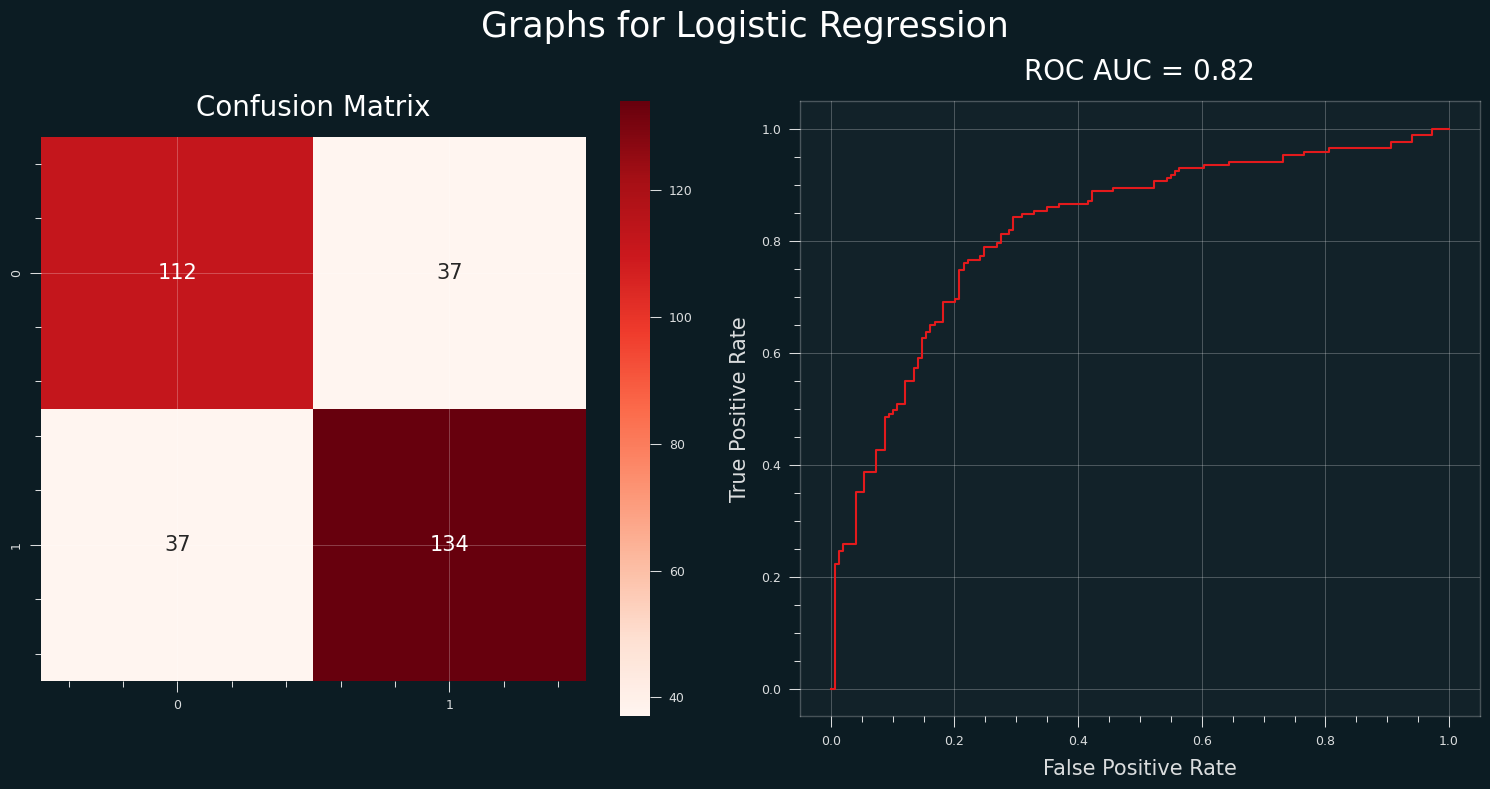

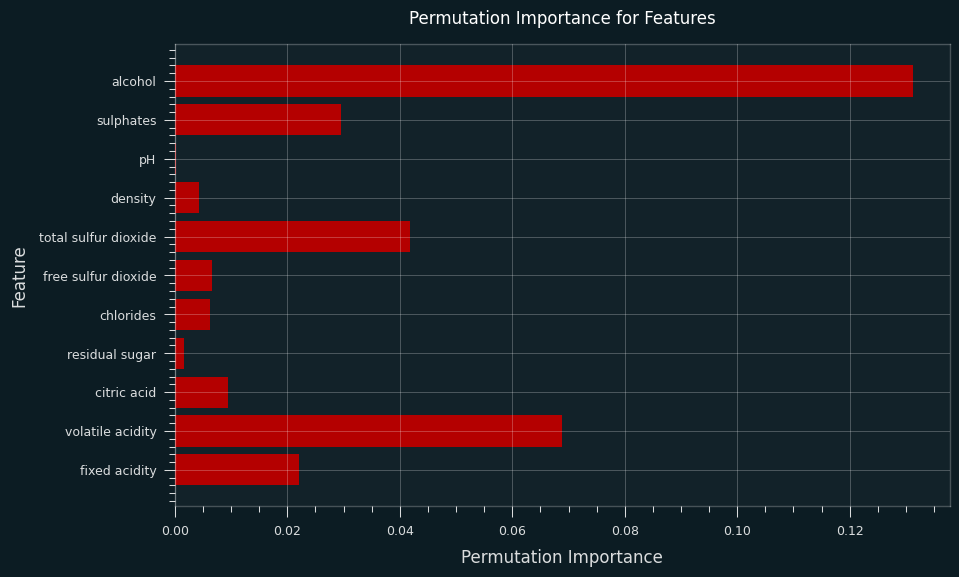

In [75]:
evaluate_model('Logistic Regression',
                           LogisticRegression(C=1.2, fit_intercept=True, 
                                              max_iter=50, penalty = 'l1', solver='saga'))

# 2. Tree-Based Models

Tree-based algorithms are machine learning models that are built on decision trees. These models make predictions by following a sequence of if-else logical statements based on the features of the input data.

**Decision Tree:**

A decision tree is a simple and intuitive non-linear classification or regression algorithm. It divides the feature space into regions and predicts the target variable using the majority class or mean value of the training samples in each region. 

**Random Forest:**

Random Forest is an ensemble learning technique that uses multiple decision trees to combine predictions through averaging or voting. Each tree in the forest is trained using a random subset of the training data and features. 

## Decision Trees

**Advantages:**

* Intuitive: Simple to interpret and visualize, making it suitable for non-experts.
* Handles non-linearity: Capable of capturing intricate relationships between features and targets.
* No assumptions: Makes no assumptions about the underlying data distribution.

**Disadvantages:**

* Overfitting: Decision trees tend to overfit noisy data, resulting in poor generalization.
* Instability: Small variations in the data can result in a completely different tree, affecting robustness.
* Bias towards dominant classes: An unbalanced dataset can bias the tree towards the majority class.

Outliers can have an impact on decision trees, however pruning and ensemble methods like Random Forests can help to limit their effects.


**Important hyperparameters:**

1. Criterion: The function that evaluates the quality of a split. Common options are "gini" for Gini impurity and "entropy" for information gain.

2. Max_depth: The tree's maximum depth. Higher depths can result in overfitting.

3. Max_leaf_nodes:Limits the maximum number of leaf nodes in the decision tree, which helps to limit the tree's complexity and prevent overfitting.

4. Max_features: The number of features to consider when looking for the best split.


 For Decision Tree Classifier
 Training Accuracy: 100.0000 %
 Testing Accuracy: 79.0625 %
 Accuracy Score: 79.0625 %



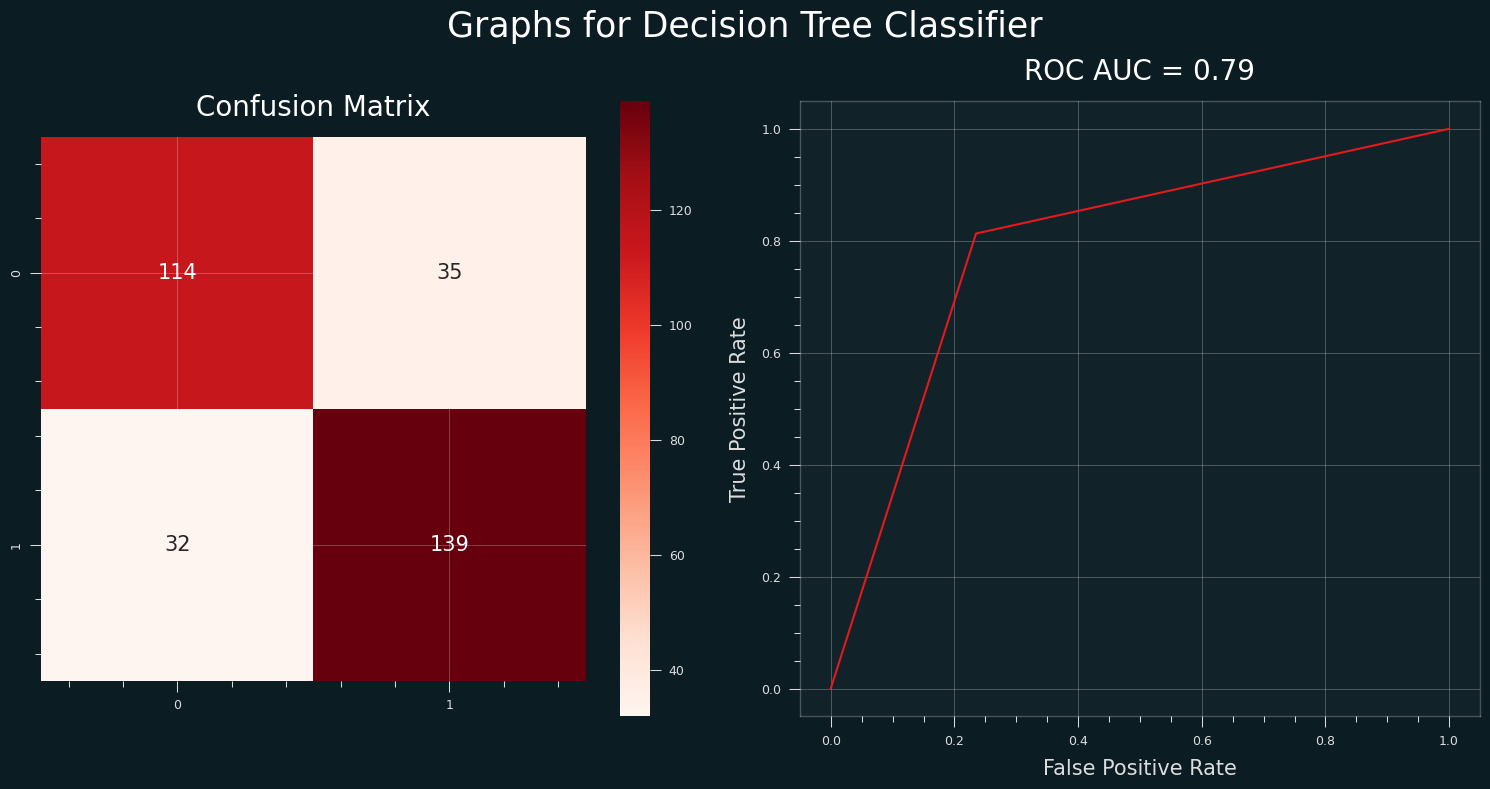

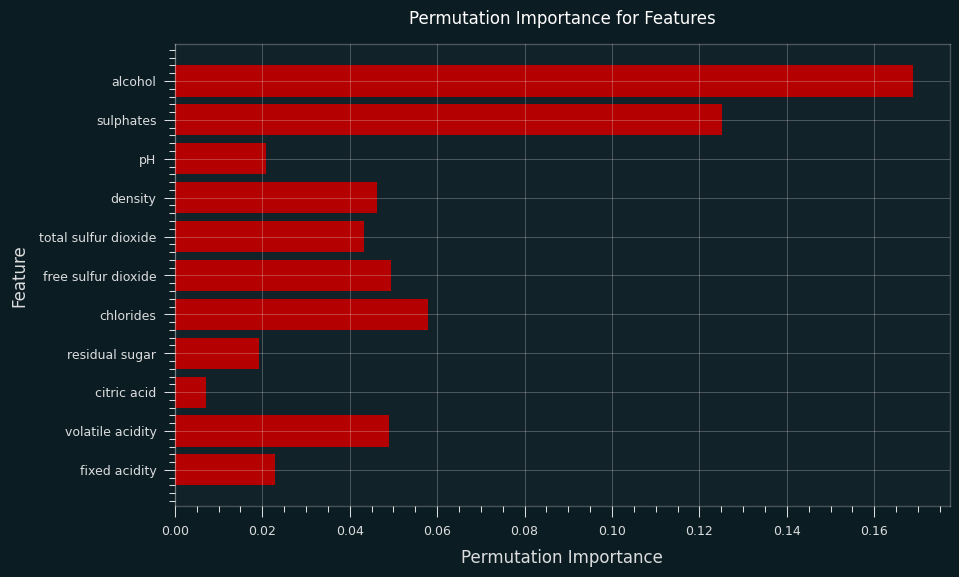

In [76]:
evaluate_model('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy',
                                      splitter = 'best', 
                                      max_features=6, max_depth = 20,
                                      max_leaf_nodes=200, random_state = 33))

## Random Forests

**Advantages:**
* High Accuracy: Random Forest combines several decision trees to make accurate forecasts.
* Robustness: It is less likely to overfit than individual decision trees, making it suitable for various datasets.
* Handles Nonlinearity: Random Forest can detect complex relationships between features and the target variable.

**Disadvantages:**
* Complexity: Random Forest models can be computationally expensive and challenging to interpret, especially with a large number of trees.
* Less Intuitive: Combining multiple decision trees results in a less intuitive forecast compared to a single tree.
* Difficult to interpret: Although feature importance can be retrieved, understanding the decision-making process of a Random Forest model can be challenging.
* Memory Consumption: Random Forest uses more memory to keep many trees, especially for large datasets with many features.

**Important hyperparameters:**
1. n_estimators: Number of trees in the forest. Increasing the number of trees improves overall performance but raises computational costs.
2. Criterion: The function used to measure the quality of a split in each tree, such as "gini" for Gini impurity or "entropy" for information gain.
3. max_depth: The maximum depth of each decision tree within the forest. Increasing max_depth can lead to overfitting, but limiting it helps to avoid this problem.
6. Max_features: The amount of features to examine while determining the optimal split. It controls the randomness of feature selection at each split.

 For Random Forest Classifer
 Training Accuracy: 100.0000 %
 Testing Accuracy: 83.7500 %
 Accuracy Score: 83.7500 %



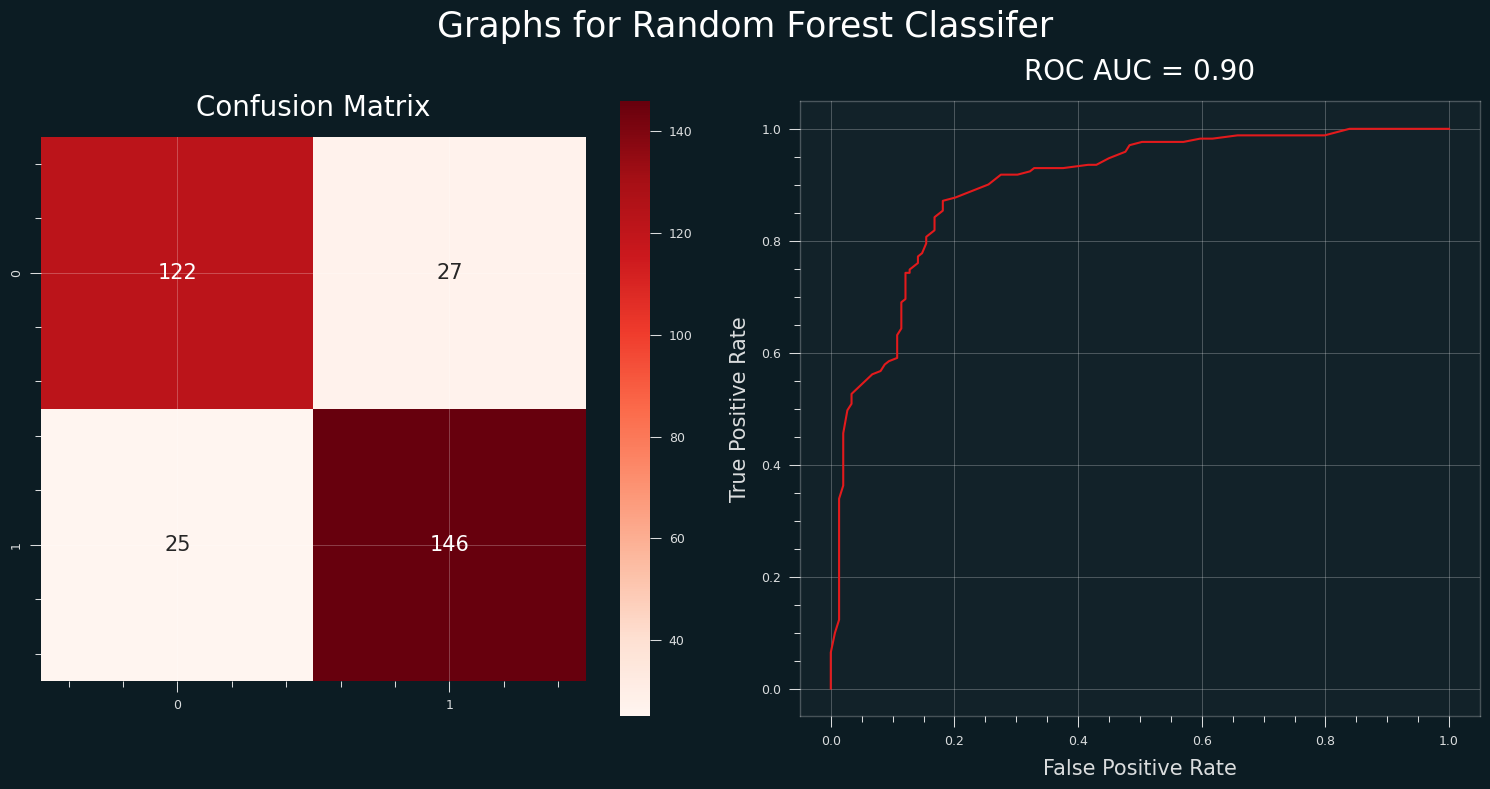

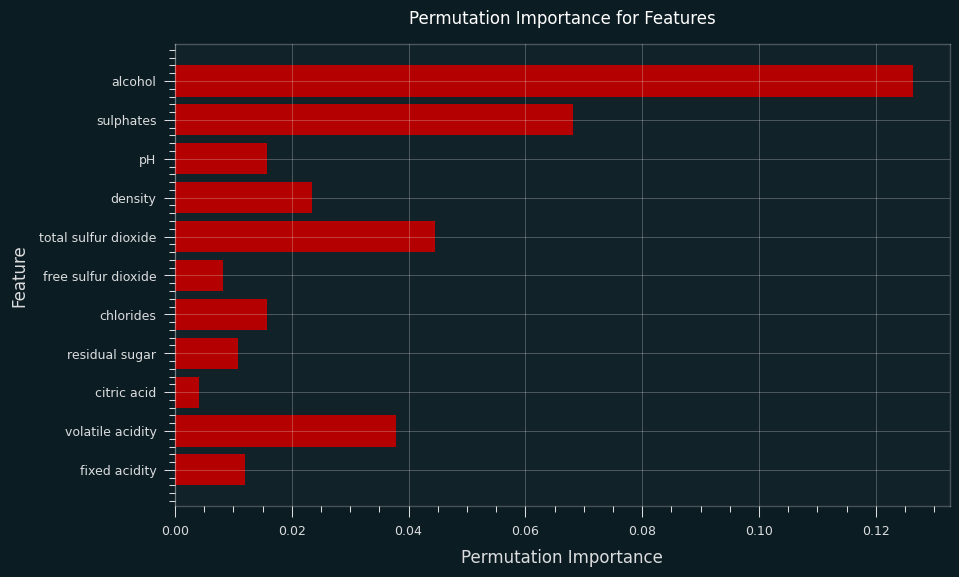

In [77]:
evaluate_model('Random Forest Classifer', 
               RandomForestClassifier(criterion = 'gini', max_depth = 30, 
                                      max_features ='auto', n_estimators = 100,
                                      random_state = 33))

# 3. Support Vector Classifier

## SVC

The Support Vector Classifier (SVC) is a powerful supervised learning algorithm designed for classification applications. It works by determining the ideal hyperplane for separating the classes in the feature space.

**Advantages:**

* Effective in high-dimensional spaces: SVC is effective in high-dimensional spaces and can handle datasets with multiple features.
* Versatile kernel functions: SVC supports multiple kernel functions, including linear, polynomial, and radial basis function (RBF), to capture complex relationships between features.
* Robust to overfitting: It is less prone to overfitting as it maximizes the margin between classes, allowing for better generalization to new data.
* Effective for both linear and non-linear classification: Can be effective for both linear and non-linear classification using appropriate kernel functions.

**Disadvantages:**

* Hyperparameter sensitivity: The regularization parameter (C) and kernel parameters have a significant impact on SVC performance. Tuning these hyperparameters can be time consuming.
* Computationally intensive:  Training an SVC model can be computationally expensive, especially for large datasets, as it requires solving a quadratic optimization problem.
* Poor performance with noisy data:  Sensitivity to noise and outliers in data might significantly effect SVC performance.

**Important hyperparameters:**

1. C (Regularization parameter): Determines the balance between maximizing margin and minimizing classification error. Higher values of C lead to a smaller margin but fewer misclassifications.
2. Kernel function: Determines the type of decision boundary. Kernels such as linear, polynomial, and radial basis function (RBF) are frequently used.
3. Gamma (Kernel coefficient): Determines the impact of individual training samples on the decision boundary. Higher gamma values result in more complex decision boundaries.

 For Support Vector Classifier
 Training Accuracy: 78.7334 %
 Testing Accuracy: 79.3750 %
 Accuracy Score: 79.3750 %



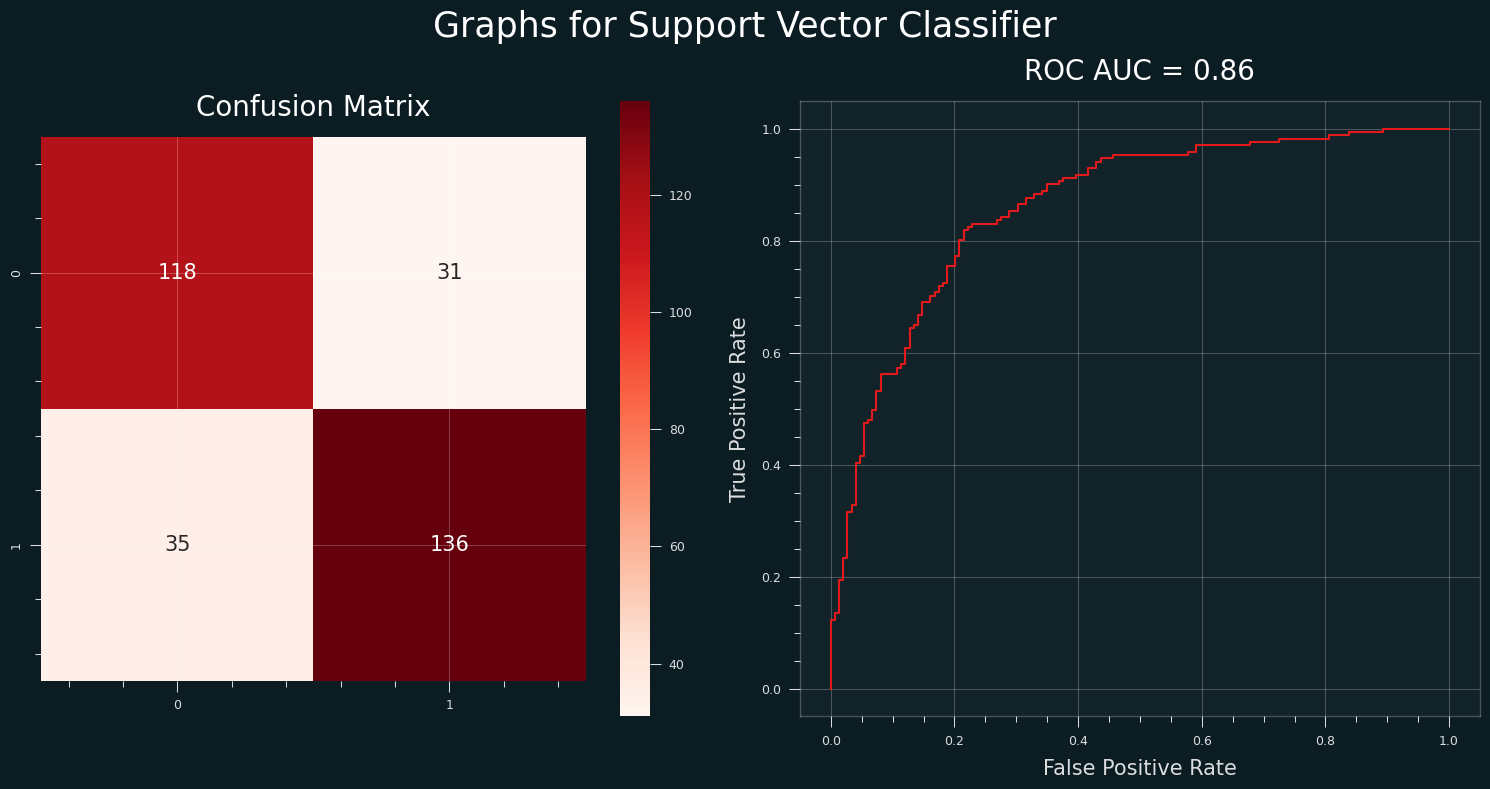

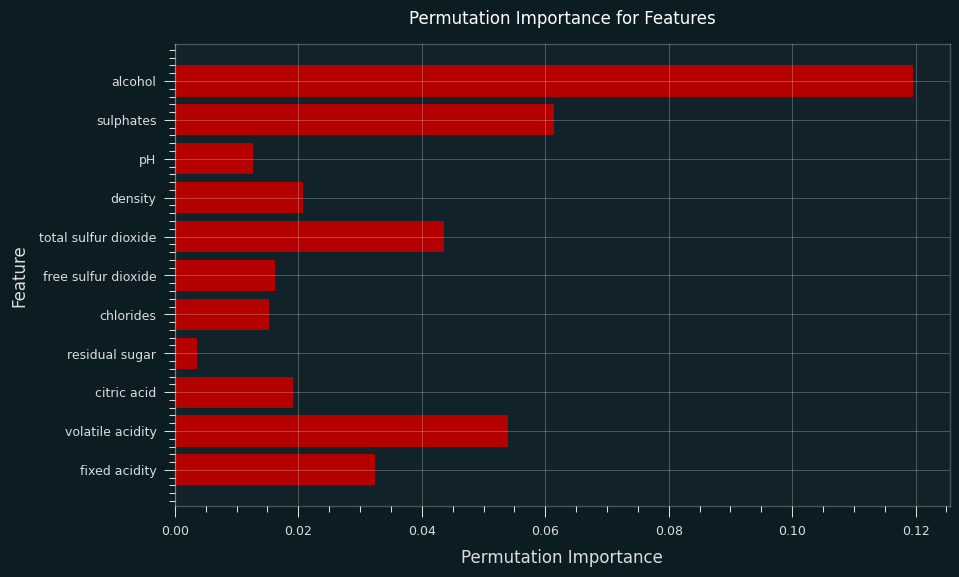

In [78]:
evaluate_model('Support Vector Classifier', SVC( C = 1, gamma = 'auto',
                                                kernel = 'rbf', random_state = 33, probability=True))

# 4. Boosting Models

Boosting models sequentially build a strong learner from weak learners, focusing on correcting errors in each iteration. They give higher weights to misclassified instances, emphasizing difficult cases in subsequent iterations. Boosting models increase predictive accuracy by optimizing a loss function using gradient descent. The final prediction is obtained by aggregating the predictions of all individual learners. 

## Gradient Boosting

**Advantages:**

* High prediction accuracy: Gradient Boosting excels at a variety of machine learning applications.
* Robust to outliers: It uses strong approaches such as shrinkage and tree-based learning to mitigate the influence of outliers.
* Feature importance: Provides information on feature importance, which aids in feature selection and interpretation.

**Disadvantages:**

* Hyperparameter sensitivity: Fine-tuning hyperparameters is critical to performance and can be time-consuming.
* Computationally expensive: Training large ensembles of decision trees can be time-consuming, particularly for deep trees.
* Prone to overfitting: Gradient Boosting can overfit noisy or small datasets, needing regularization approaches such as shrinking.

**Important hyperparameters:**

1. Loss: This parameter in gradient boosting determines the optimization goal. Choose "log_loss" for classification tasks similar to logistic regression or "exponential" to prioritize challenging sample classification, similar to AdaBoost.
2. Learning Rate (or shrinkage): Determines how much each tree contributes to the final prediction, hence preventing overfitting and improving generalization.
3. Number of Trees (n_estimators): Determines the number of boosting iterations or the size of the ensemble.
4. Tree-specific parameters: Maximum depth, minimum samples per leaf, and maximum number of features to consider for each split are some of the parameters that influence individual decision trees.

 For Gradient Boosting Classifier
 Training Accuracy: 98.7490 %
 Testing Accuracy: 83.4375 %
 Accuracy Score: 83.4375 %



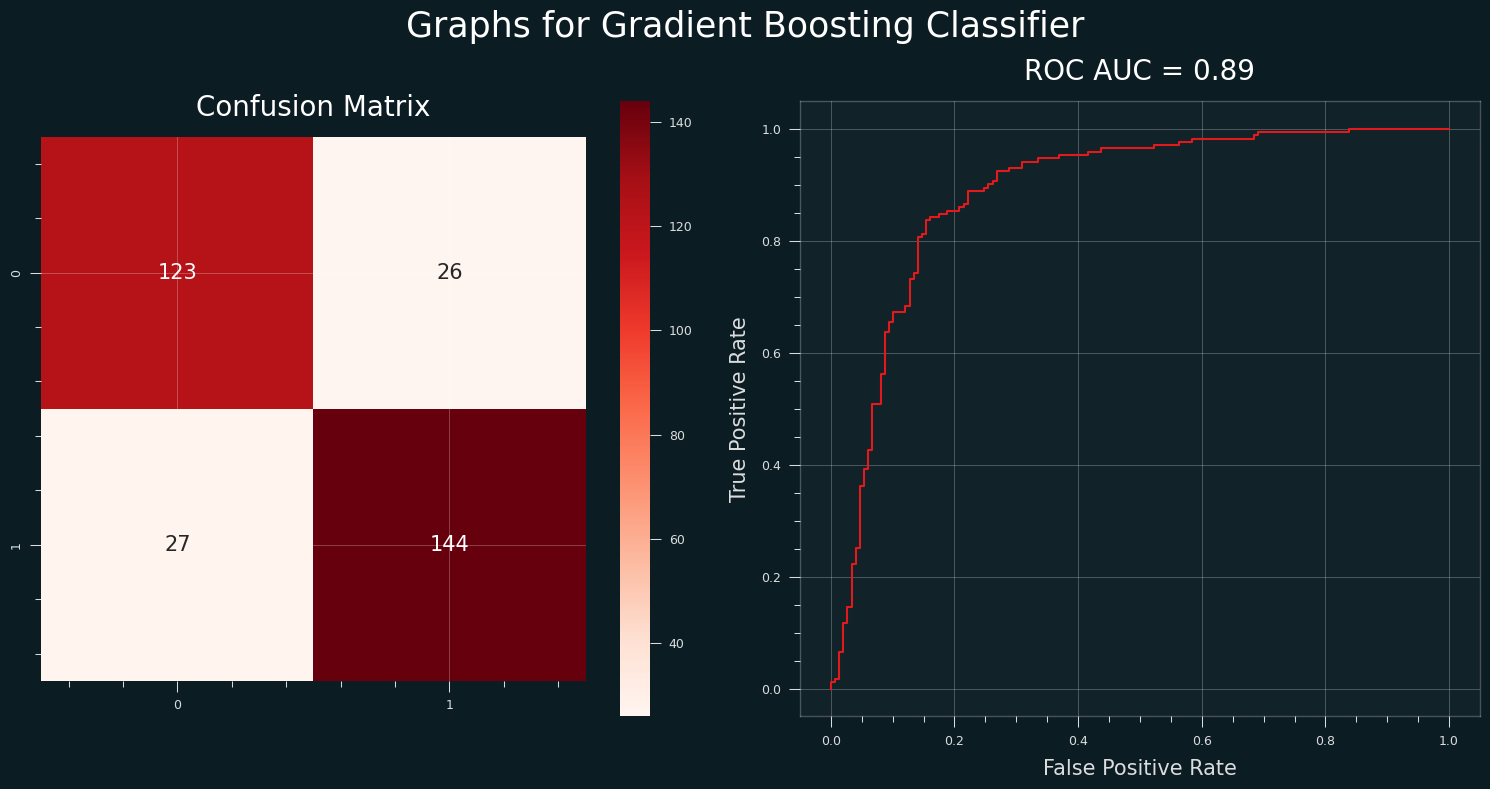

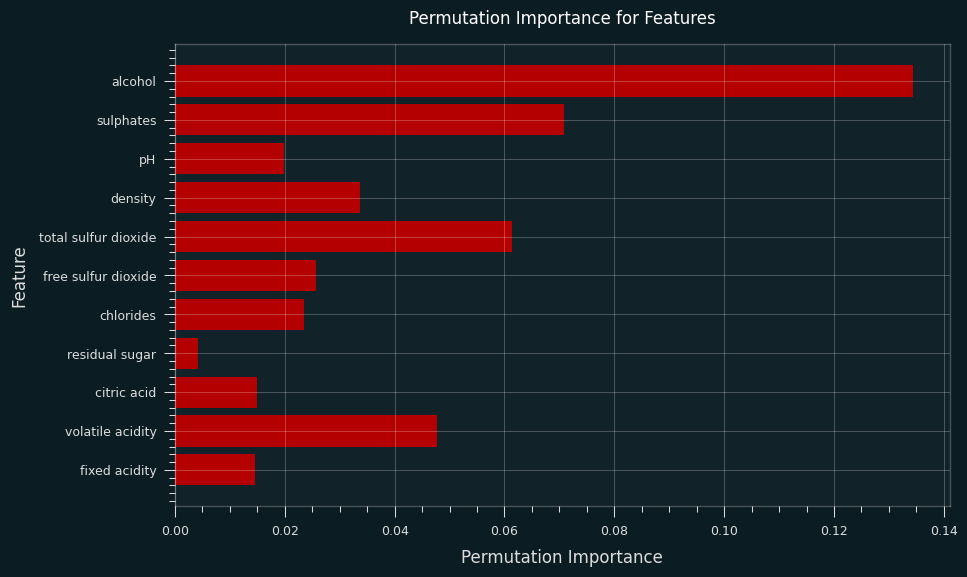

In [79]:
evaluate_model('Gradient Boosting Classifier', 
               GradientBoostingClassifier( loss = 'exponential',learning_rate = 0.2, max_depth = 5,
                                          min_samples_split = 5, min_samples_leaf = 2,
                                          subsample= 1.0,
                                          n_estimators = 60, random_state = 33))

## XGBoost

**Advantages:**

* High performance: XGBoost is optimized for speed and efficiency, making it one of the quickest gradient boosting techniques.
* Regularization: Built-in regularization techniques avoid overfitting and enhance generalization.
* Flexible: Supports several objective functions and assessment criteria, making it adaptable to different tasks.

**Disadvantages:**

* Sensitivity to hyperparameters: To achieve optimal performance, hyperparameters must be carefully tuned.
* Memory usage: Can be memory-intensive for large datasets with numerous features.
* Black-box model: Interpretability can be limited compared to simpler models like decision trees.


**Important hyperparameters:**

* Booster: The type of booster to employ. It can be 'gbtree' for tree-based models, 'gblinear' for linear models, or 'dart' for Dropouts Meet Multiple Additive Regression Trees.

* Learning Rate: Determines the step size shrinking utilized to prevent overfitting. Typical values vary from 0.01 and 0.3.

* max_depth: The maximum depth of a tree. Increasing this value increases the model's complexity and the risk of overfitting.

* min_child_weight: Minimum sum of instance weight (hessian) required in a child. Higher values help to avoid overfitting.

* Subsample: the fraction of observations to be randomly selected for each tree. Lower values make the algorithm more conservative, which reduces overfitting.

* Column Subsample (colsample_bytree): The fraction of features to be randomly sampled for each tree. Similar to subsamples, but for features.

* gamma: Minimum loss reduction required to make a further partition on a leaf node.

* Objective Function: specifies the loss function to be optimized. 'binary:logistic' is used for binary classification.


 For XGBoost Classifier
 Training Accuracy: 100.0000 %
 Testing Accuracy: 84.6875 %
 Accuracy Score: 84.6875 %



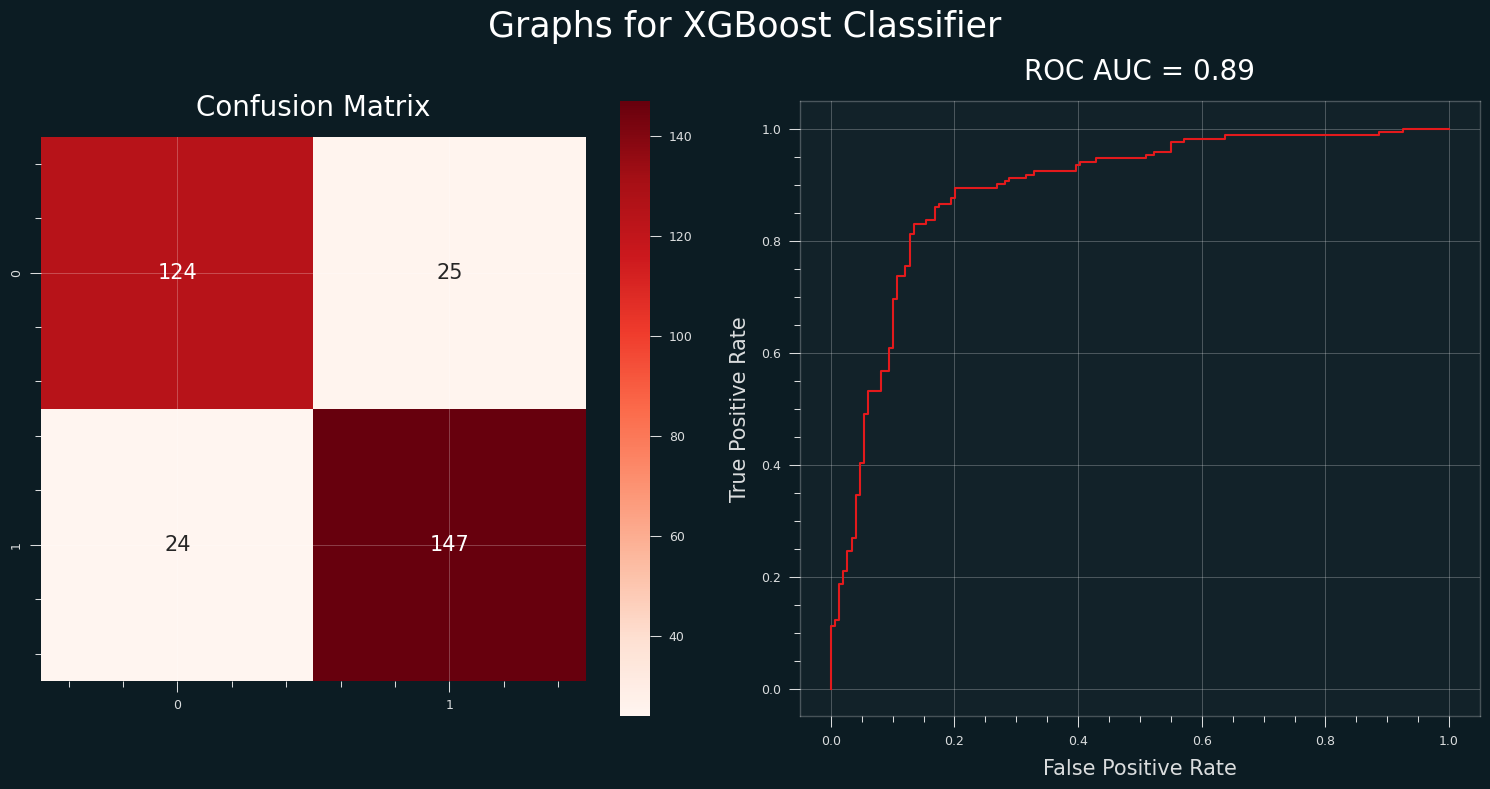

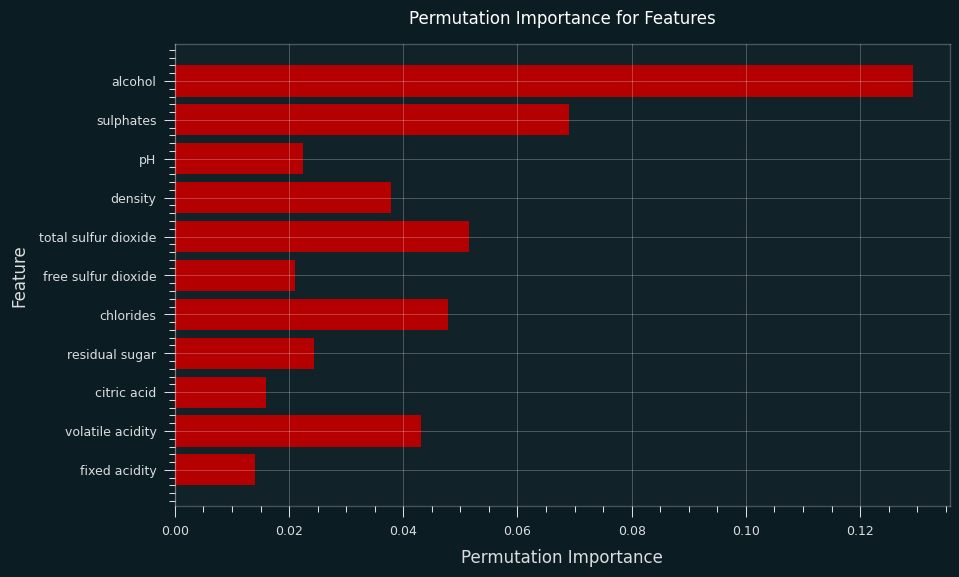

In [80]:
evaluate_model('XGBoost Classifier', XGBClassifier(
    booster='gbtree',
    gamma = 0.09,
    learning_rate=0.15,
    n_estimators=200,
    max_depth=13,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',  # or 'multi:softmax' for multiclass classification
    random_state=33
))

## Light GBM Model

**Advantages:**

1. Efficiency: Light GBM is highly efficient, providing fast training and high performance.
2. Handling Large Datasets: Its low memory usage and parallel computing capabilities allow it to handle large datasets with millions of instances and features.
3. Optimization: Light GBM uses a novel tree learning algorithm and histogram-based approach, leading to better accuracy with less computational resources.

**Disadvantages:**

1. Overfitting: Light GBM is prone to overfitting, particularly on smaller datasets or when hyperparameters are improperly configured.
2. Interpretability: The model's complexity may make it difficult to interpret, making it less suited for applications where understanding the importance of features is critical.
3. Limited Tuning Parameters: Tuning a wide range of hyperparameters effectively requires careful experimentation and domain knowledge.

**Important hyperparameters:**

* Boosting Type (boosting_type): Determines the boosting technique to be used, such as 'gbdt' (classic Gradient Boosting Decision Tree).

* Regularization parameters (reg_alpha and reg_lambda) These control the L1 (Lasso) and L2 (Ridge) regularization terms, respectively, to prevent overfitting by penalizing large weights in the model.

 For Light Gradient Boosting Machine
 Training Accuracy: 100.0000 %
 Testing Accuracy: 83.4375 %
 Accuracy Score: 83.4375 %



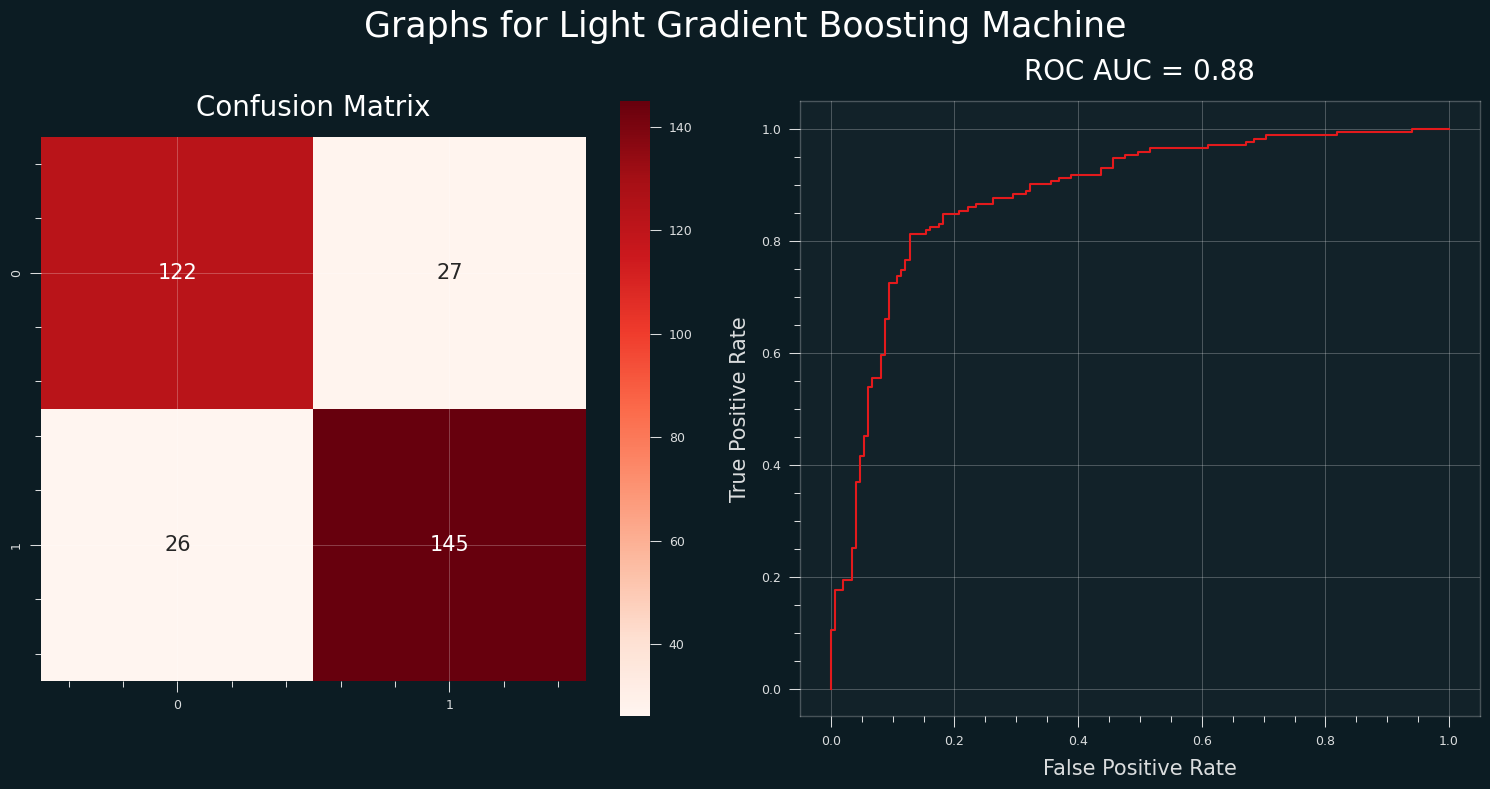

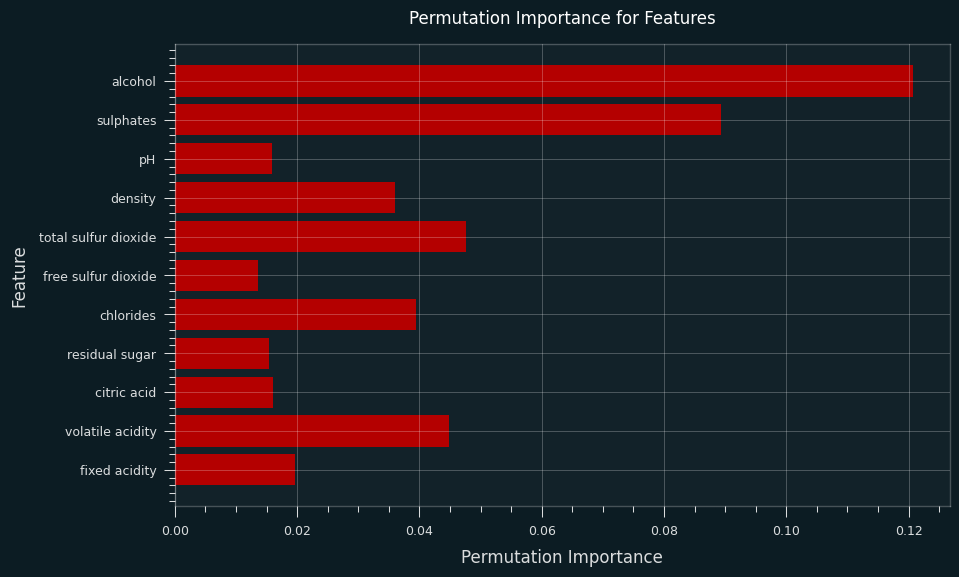

In [81]:
evaluate_model('Light Gradient Boosting Machine', lgbm.LGBMClassifier(
    boosting_type='gbdt',
    learning_rate=0.1,
    n_estimators=110,
    max_depth=15,
    num_leaves = 40,
    min_child_weight = 1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha = 0.0, 
    reg_lambda = 0.1,
    random_state=33,
    verbose=-1))    

# 5. Distance-Based Models

## K-Nearest Neighbors Model

**Advantages:**

1. Simplicity: KNeighborsClassifier is easy to understand and implement, making it suitable for beginners and quick prototyping.
2. Non-parametric: It makes no assumptions about the underlying data distribution, making it suitable for a wide range of data.
3. Adaptability: Can easily handle multi-class classification and regression tasks.

**Disadvantages:**

1. Computational Complexity: As the training dataset increases in size, the prediction time increases since every training instance must be stored.
2. Sensitive to Noise and Outliers: Outliers and noisy data may significantly influence the performance since it considers all neighbors equally.
3. Scaling Sensitivity: Performance can decrease if features are not scaled appropriately, as it relies on distance measures.

**Important hyperparameters:**

* n_neighbors: The number of neighbors to consider for classification. 
* Weights: Sets the weight of each neighbor during prediction, with options such as 'uniform' (all neighbors weighted equally) or 'distance' (weights inversely proportional to distance).
* metric: The distance metric used to calculate the similarity of instances, such as 'euclidean','manhattan', or'minkowski'.
* algorithm: Defines the algorithm used to determine the nearest neighbors, such as 'auto', 'ball_tree', 'kd_tree', or 'brute'. It influences computational complexity and memory usage.

 For K Nearest Neighbors
 Training Accuracy: 100.0000 %
 Testing Accuracy: 81.5625 %
 Accuracy Score: 81.5625 %



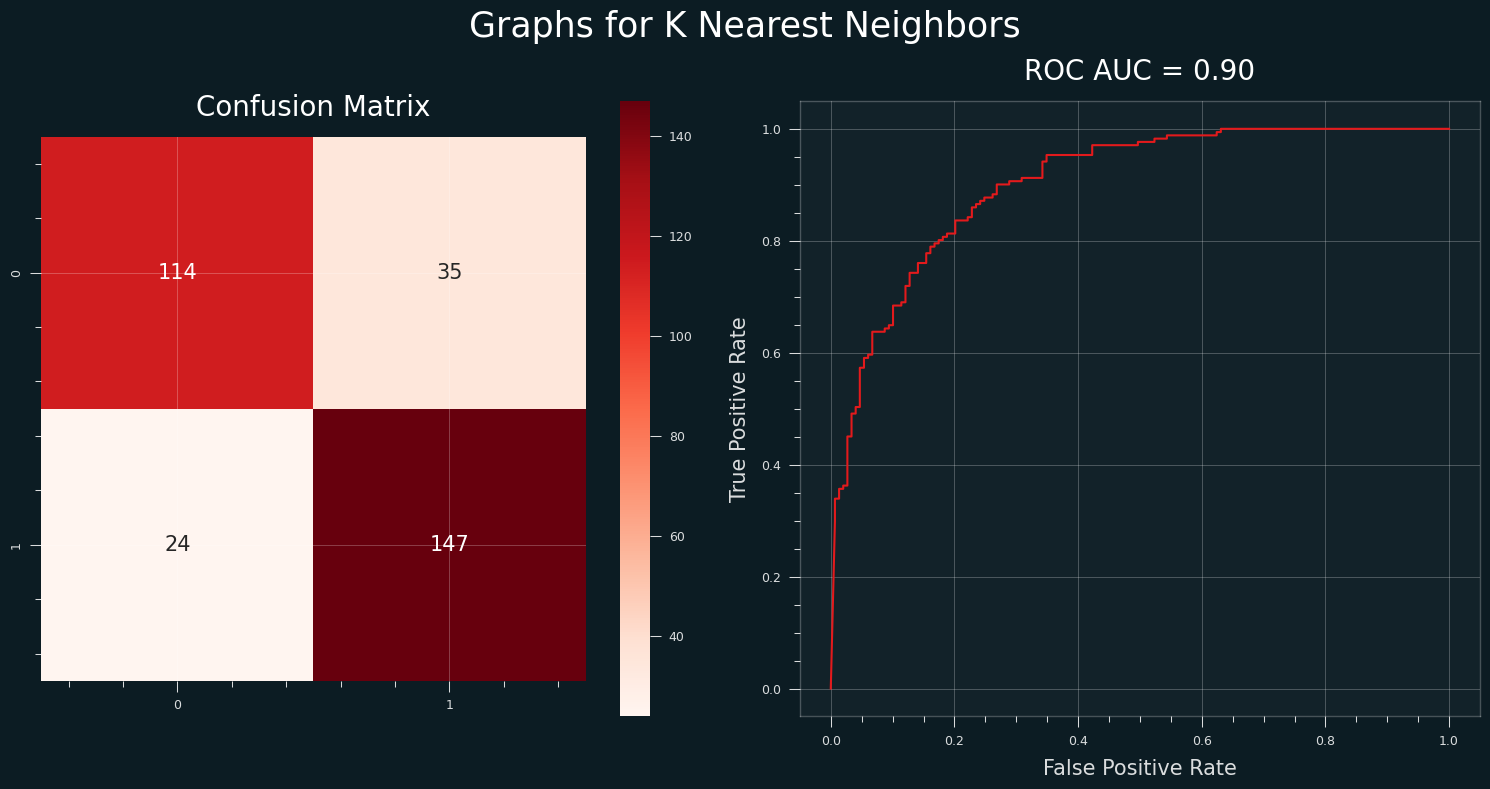

In [82]:
evaluate_model('K Nearest Neighbors', 
               KNeighborsClassifier(algorithm = 'auto',
                                    leaf_size = 20, metric = 'euclidean',
                                    n_jobs = -1, n_neighbors = 25, p = 2,
                                    weights = 'distance'))

# Visualizing Models Performance

In [84]:
predict = pd.DataFrame(data = models, columns=['Model', 'True Positive', 'False Positive',
                                               'True Negative','False Negative',
                                               'Accuracy(training)', 'Accuracy(test)'])
predict

Model  True Positive  False Positive  \
0              Logistic Regression            112              37   
1         Decision Tree Classifier            114              35   
2          Random Forest Classifer            122              27   
3        Support Vector Classifier            118              31   
4     Gradient Boosting Classifier            123              26   
5               XGBoost Classifier            124              25   
6  Light Gradient Boosting Machine            122              27   
7              K Nearest Neighbors            114              35   

   True Negative  False Negative  Accuracy(training)  Accuracy(test)  
0            134              37            0.741986        0.768750  
1            139              32            1.000000        0.790625  
2            146              25            1.000000        0.837500  
3            136              35            0.787334        0.793750  
4            144              27            0.987490        0.834375  
5            147              24            1.000000        0.846875  
6            145              26            1.000000        0.834375  
7            147              24            1.000000        0.815625

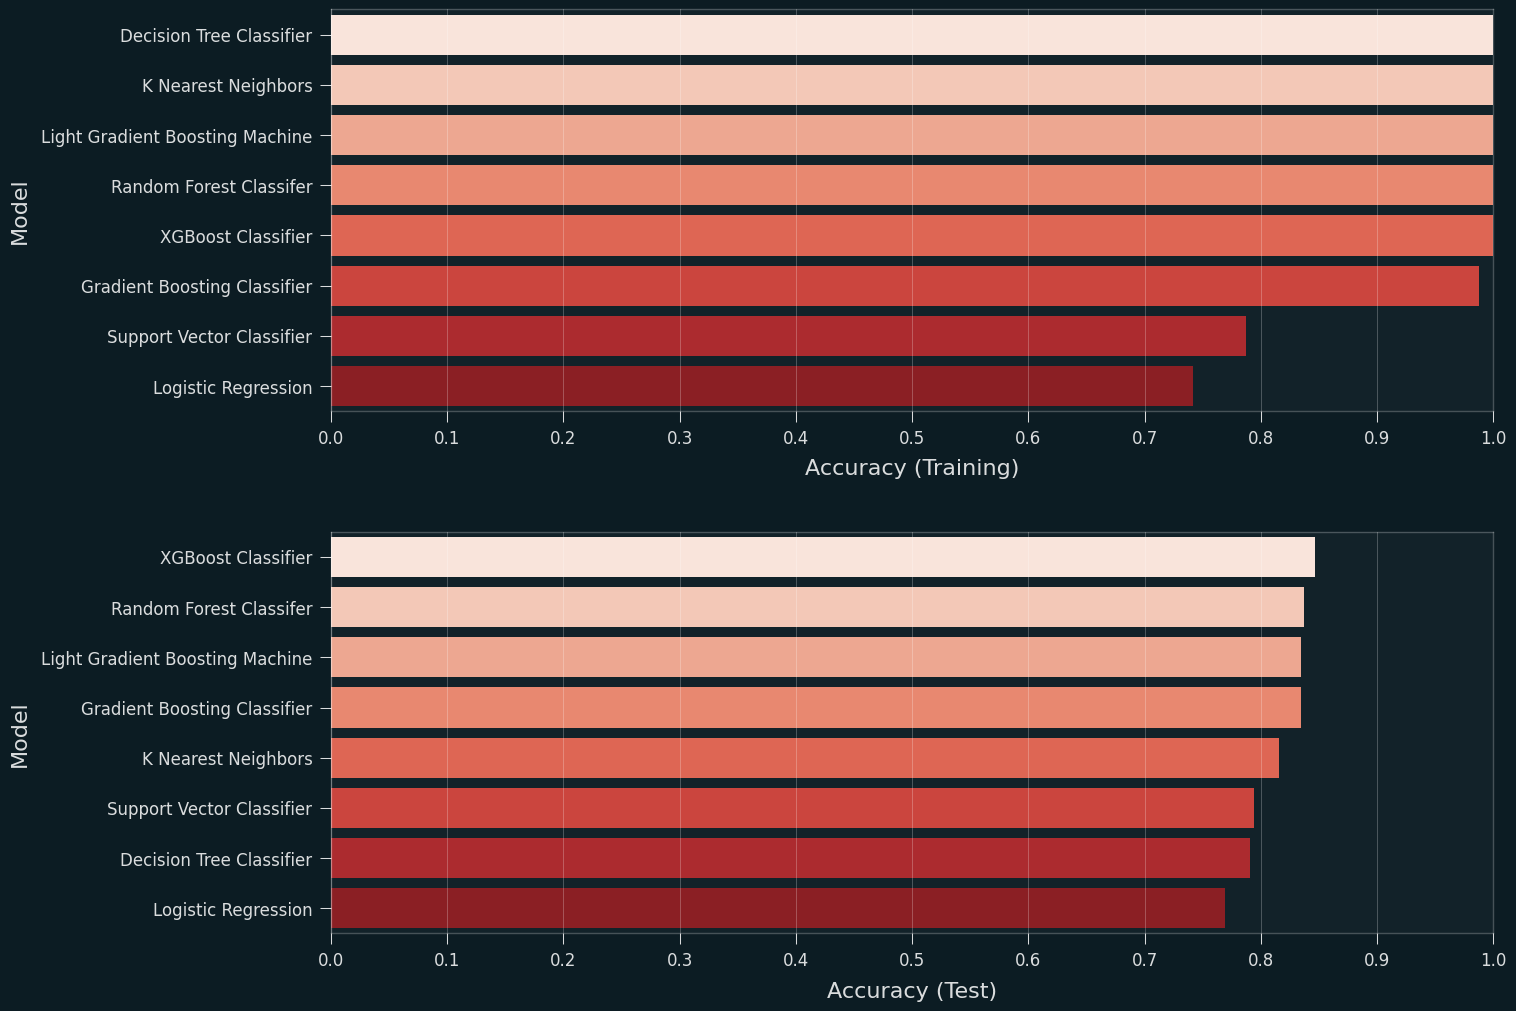

In [88]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 1, 1)
predict.sort_values(by=['Accuracy(training)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(training)', y='Model', data=predict, palette='Reds') 
plt.xlabel('Accuracy (Training)', size=16)
plt.ylabel('Model', size=16)
plt.xlim(0, 1.0)
plt.xticks(np.arange(0, 1.1, 0.1), size=12)
plt.yticks(size=12)

plt.subplot(2, 1, 2)
predict.sort_values(by=['Accuracy(test)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(test)', y='Model', data=predict, palette='Reds')  
plt.xlabel('Accuracy (Test)', size=16)
plt.ylabel('Model', size=16)
plt.xlim(0, 1.0)
plt.xticks(np.arange(0, 1.1, 0.1), size=12)
plt.yticks(size=12)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.3)

plt.show()


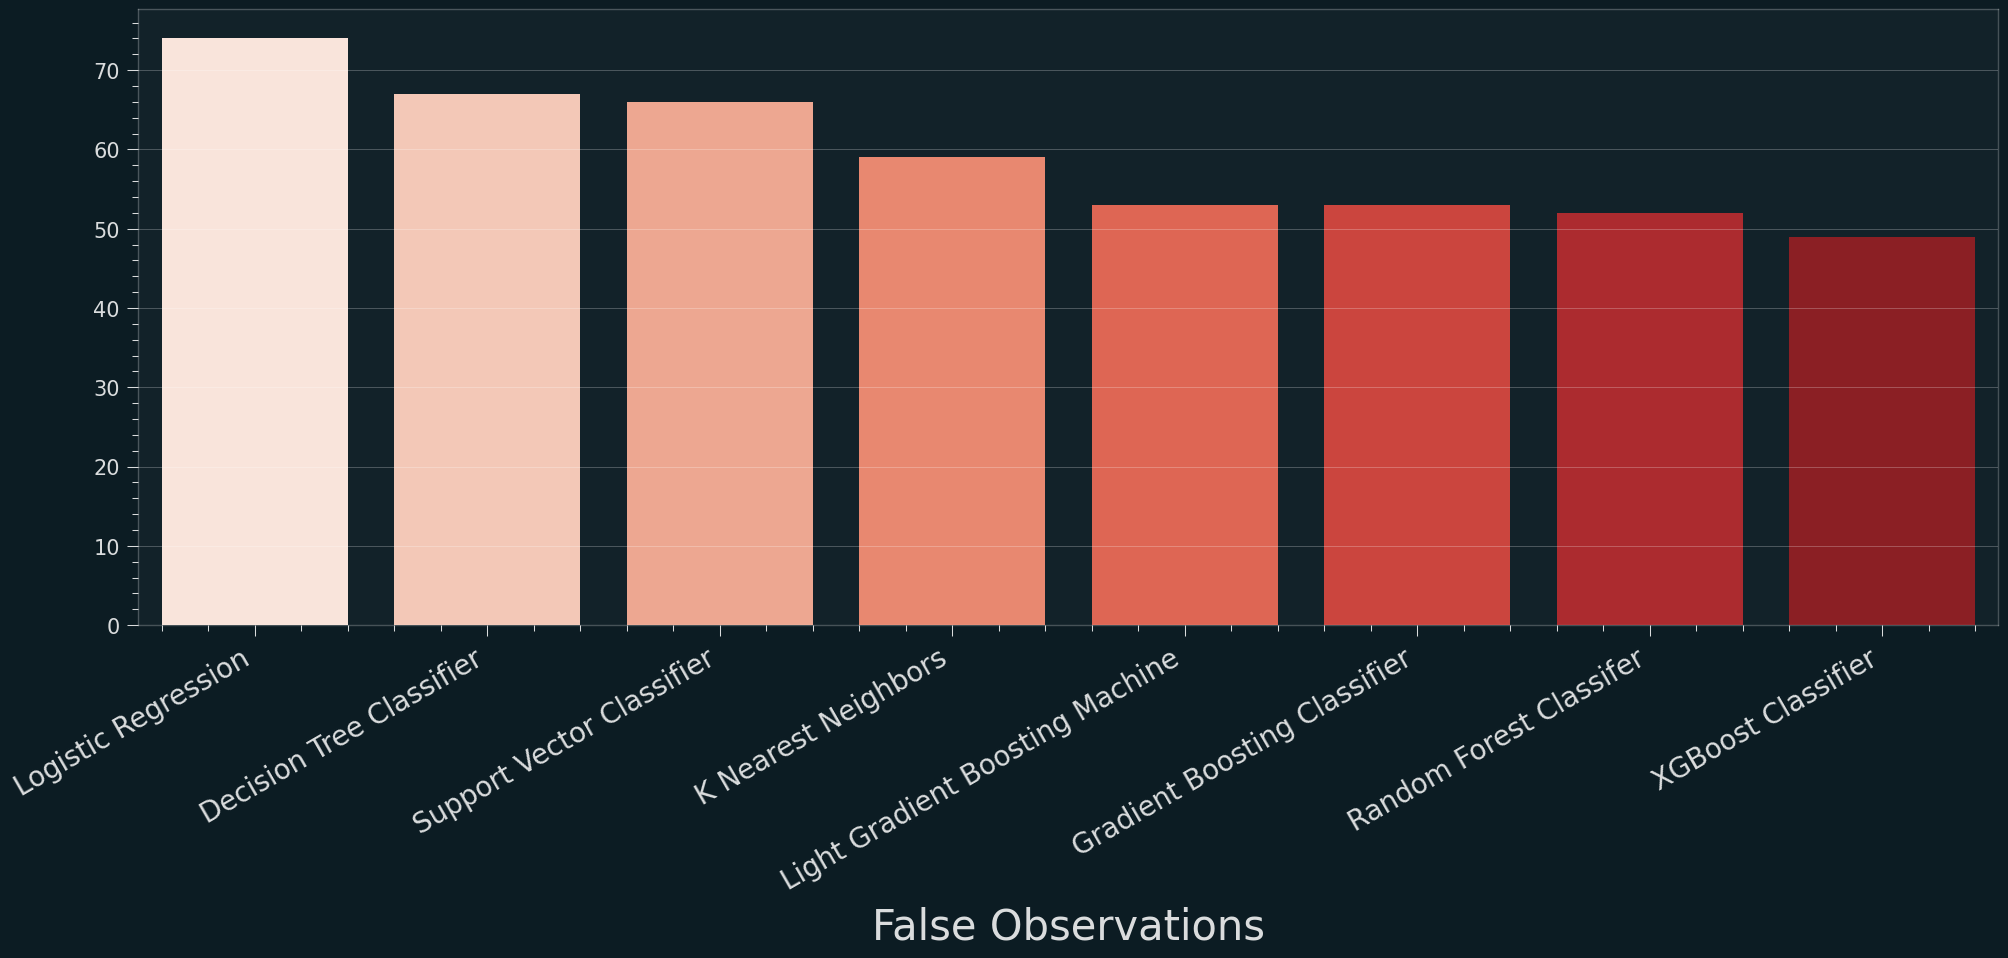

In [87]:
plt.figure(figsize=(24,8))

predict.sort_values(by=(['Accuracy(test)']), ascending=True, inplace=True)
sns.barplot(x = predict['Model'], y=predict['False Positive'] + predict['False Negative'], palette='Reds')
plt.xlabel('Model', size=30)
plt.xticks(size=20, rotation=30, ha='right')
plt.xlabel('False Observations', size=30)
plt.yticks(size=15)

plt.show()

# Conclusion

>In this analysis, we evaluated several machine learning algorithms for a classification task. **XGBoost Classifier** outperformed other models with **the highest test set accuracy** (84.69%), closely followed by Random Forest Classifier (83.75%). These ensemble methods excel in capturing complex data relationships, resulting in high predicted accuracy.  However, Logistic Regression, Decision Tree Classifier, and Support Vector Classifier had lower accuracy, probably due to limitations in handling non-linear relationships and overfitting. Overall, the findings highlight the effectiveness of ensemble techniques in achieving superior predictive performance.

<center style="font-size:18px;">I hope you found value in this notebook. If you have any suggestions or thoughts, please feel free to share them. If you enjoyed the content, consider giving it an <span style="color:#ff0000;">UPVOTE</span>.</center>

<h1><center>Thank You!</center></h1>